In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
# from matplotlib import cbook
from matplotlib import cm
from matplotlib.colors import LightSource

In [ ]:
def plot_surface(ordr, learning_rate, batch, rmse_inverse, initxangle=0, inityangle=0):
    def poly_matrix(x, y, order):
        ncols = (order + 1)**2
        G = np.zeros((x.size, ncols))
        ij = itertools.product(range(order+1), range(order+1))
        for k, (i, j) in enumerate(ij):
            G[:, k] = x**i * y**j
        return G    
    points = np.array([[learning_rate[i], batch[i], rmse_inverse[i]] for i in range(len(rmse_inverse))])
    x, y, z = points.T
    G = poly_matrix(x, y, ordr)
    m = np.linalg.lstsq(G, z)[0]
    nx, ny = 30, 30
    xx, yy = np.meshgrid(np.linspace(x.min(), x.max(), nx),
                     np.linspace(y.min(), y.max(), ny))
    GG = poly_matrix(xx.ravel(), yy.ravel(), ordr)
    zz = np.reshape(np.dot(GG, m), xx.shape)
    plt.figure(figsize=(15,15))
    fg, ax = plt.subplots(subplot_kw=dict(projection='3d'), figsize=(15,15))
    ls = LightSource(270, 45)
    rgb = ls.shade(zz, cmap=cm.gist_earth, vert_exag=0.1, blend_mode='soft')
    surf = ax.plot_surface(xx, yy, zz, rstride=1, cstride=1, facecolors=rgb,
                       linewidth=0, antialiased=False, shade=False, alpha=0.1)
    ax.set_xlabel('Learning Rate')
    ax.set_ylabel('Batch Size')
    ax.set_zlabel('RMSE Inverse')
    ax.plot3D(x, y, z, "o")

    maxlearning = max(rmse_inverse)
    xmax = learning_rate[rmse_inverse.index(maxlearning)]
    ymax = batch[rmse_inverse.index(maxlearning)]
    ax.scatter(xmax, ymax, maxlearning, color = "red")

    fg.canvas.draw()
    ax.view_init(initxangle, inityangle)
    plt.show()

In [ ]:
# Group 1, learning rate 0.02-0.03, batch size 64-128

In [104]:
rmse_inverse_first = [28.8611845565709, 28.93824862173499, 33.6397553580179, 27.556712034591847, 28.680397683300953, 31.97293083616487, 28.44908158679652, 28.988637716657163, 28.681783745095203, 28.359666650096667, 28.989029336000605, 28.97850270692172, 23.46936172641815, 2.974225701758058, 28.954066230339297, 28.97740161847619, 32.09752027650448, 28.434396269849444, 28.788243764829993, 28.979236460636162, 28.98826056077767, 28.961515196465438, 34.05269620338074, 32.25851175351895, 34.15821292189616, 28.959576683886194, 28.973922045338675, 28.778948612571718, 28.878119754800835, 28.96314969951242, 28.98799765233188, 34.423593647820844, 33.47753673050229, 28.834623032637687, 28.683083723260584, 28.55927495371209, 28.904817777739858, 32.53124708467595, 28.300431139739878, 28.84306421215954, 27.045089067719285, 28.904754425382297, 28.80848770588933, 22.864850932831985, 28.684698195858687, 28.380201625467954, 29.952540955216108, 29.00614060574163, 28.292999649160084, 28.78588951276742, 28.59178740950726, 27.570696350132238, 28.771964567136674, 31.77370799135606, 28.979572638644566]
learning_rate_first = [0.02720324493442158, 0.0230233257263184, 0.02092338594768798, 0.023455607270430476, 0.025388167340033567, 0.023347736395700862, 0.03, 0.026288117640027624, 0.02758691337562565, 0.021614581718546202, 0.028807490504668062, 0.023520196209863356, 0.023928756964719123, 0.027020481994531945, 0.024066836824442297, 0.028691224173438917, 0.02716977150624074, 0.023869086928756177, 0.02570878862733933, 0.026841042614089018, 0.027889402367088915, 0.029001624923226332, 0.021987304047438296, 0.028328262397047527, 0.028394900039326595, 0.026097204168460963, 0.027685545161228103, 0.026627006885265293, 0.02487979895010642, 0.025374092625049173, 0.022144510316109402, 0.025233644266538284, 0.028526209217808046, 0.022199843473008147, 0.022981388333726344, 0.029457878778571568, 0.028813489106521588, 0.026022259406767157, 0.024703881770821022, 0.028654814634575587, 0.027312052613221532, 0.024566070201797637, 0.028402702270658796, 0.028090163860953338, 0.025274064110697887, 0.026392842931545882, 0.022414684235866, 0.028587648965364778, 0.026697266430991424, 0.02997808314818316, 0.02400036007720855, 0.028639544236739055, 0.020164984754564408, 0.02963728849091328, 0.02186296817960046]
batch_first = [int(x) for x in [90.68940830096474, 64.00731998831007, 73.39237701229524, 75.92065352817093, 89.39311835076288, 72.75681977953997, 74.12007126822027, 73.55562964311869, 69.50861427399062, 89.32015437822473, 73.32859814730887, 91.6668268154178, 103.03356874600492, 99.40488392259589, 73.50047006612226, 73.38590901956172, 73.41122722268454, 72.79581327977695, 73.41343735410345, 74.75689087784812, 73.40149326859255, 72.76950859897731, 72.75083999506376, 78.04695099655324, 72.74769130806875, 118.02250845234147, 114.65611850970018, 72.74045033393327, 93.53231988845232, 78.05819149094631, 84.11764676309734, 78.03717443365312, 78.02297976397449, 78.02811180320376, 111.2744172096985, 106.61568892497661, 78.23380214913033, 78.00854716012915, 121.29452744300234, 91.65891933359768, 73.41129059400072, 123.26177955379552, 120.46898114126049, 103.11669721398432, 68.00849620454784, 85.96979474210784, 110.541926360263, 112.09524374221081, 74.15406498679552, 82.72466247461549, 125.32730885578425, 72.40179618324171, 108.09600586038388, 107.1400553697913, 76.41517289556987]]
rmse_inverse_first_test=[27.90060148172583, 25.139161292514775, 27.789029865710308, 28.88685347124035, 30.730685624319342, 28.91385966602149, 26.304125435856292, 28.92291817549917, 28.418487664160313, 28.756877044660957, 33.80026835956391, 28.672216683285647, 28.256315275818608, 28.92894462414157, 28.984562288300214, 28.192672471524542, 28.097411169120416, 28.948956660607035, 28.75429776493055, 31.726769140947994, 28.90580617303958, 28.942704916360317, 28.975330390122657, 27.662465306601824, 28.789484012261216, 28.860842674651973, 28.95499356102487, 28.96460781263327, 28.53611607865595, 28.9520831755206, 28.98958480093922, 28.92831311282175, 28.610597205464902, 28.83595698140051, 28.80662920310994, 28.863744150515764, 28.874877565627706, 27.95159663720791, 28.10333311595281, 28.774024741235074, 28.82391932074594, 29.97098842529737, 32.513780845581145, 33.33315458815767, 28.981119850009062, 28.93669417072665, 28.175484249692204, 28.3937737294516, 28.84502118488514, 31.54233572382069, 28.925731751599862, 10.668928368350837, 27.452944085014902, 28.383974787273647, 28.732755463238274]
learning_rate_first_test=[0.0256742932534226, 0.024838309411801963, 0.024418321456075878, 0.024924765720624378, 0.025311277734544998, 0.024971402606485154, 0.02620555297117667, 0.02549126779454381, 0.025751026941663414, 0.024556560610247524, 0.025128044765764225, 0.024937683508510954, 0.025019395659482108, 0.025637740665444674, 0.02504701163142674, 0.025302218004967642, 0.02478343213675351, 0.025580559239901476, 0.025065779503940473, 0.02560185278935609, 0.025033439615320684, 0.025487962121906575, 0.024983402579339196, 0.025899296745947792, 0.02579074482566172, 0.025453085100230477, 0.025770753298783904, 0.024955340000670838, 0.025724513735479983, 0.025603299041845932, 0.024662546329760164, 0.024239251631601816, 0.02428887517592566, 0.025013007645457327, 0.025163078264795205, 0.024768317510972495, 0.02502257628407918, 0.025529142864760195, 0.025108697857114788, 0.0250523442990476, 0.024510054420940258, 0.02514685830689781, 0.025914184720670044, 0.025677677735607717, 0.02528845708867786, 0.025512212852847462, 0.024716581113711483, 0.02595117405961124, 0.02535549089336076, 0.026229260896174916, 0.025033716281979996, 0.025961553113886097, 0.02588618866816878, 0.02448461431341322, 0.024614239949772687]
batch_first_test=[int(x) for x in [74.71805462175608, 58.04174942634692, 63.90741006633764, 65.48758288875996, 73.90787340287991, 62.388227024163484, 73.90707332380504, 64.0094429606023, 61.48005835489725, 73.86227092004357, 93.54505567591347, 75.32894119328924, 82.43315489990619, 80.16522688527556, 63.974968224979534, 60.70947068730456, 71.60512983988644, 65.67488240064385, 94.42807917847867, 64.7602312323082, 86.71742158624579, 61.22663187825757, 58.476798204675966, 66.81651880649889, 78.45097164448299, 91.80124221636655, 89.69724850221573, 63.975084932450564, 65.67487582770615, 63.97300812798663, 70.61070366058895, 93.54570507474449, 58.96492726030241, 60.52882973320514, 64.75995791416601, 65.6743920384596, 73.90813076257922, 61.43532940143153, 93.54521394020219, 64.76004263459242, 59.153255655430605, 95.07578665477533, 93.33028764694092, 89.69727020714016, 60.54248456149551, 71.76829614747052, 87.1258784088175, 88.09670177253487, 60.5423921740488, 69.7400884802878, 96.36674246851828, 63.28829704817919, 69.74010338331593, 70.61037560974786, 73.86226573474195]]

In [105]:
# remove one outlier point
minlearning = min(rmse_inverse_first)
xmin = learning_rate_first[rmse_inverse_first.index(minlearning)]
ymin = batch_first[rmse_inverse_first.index(minlearning)]
learning_rate_first.remove(xmin)
batch_first.remove(ymin)
rmse_inverse_first.remove(minlearning)

<ipython-input-68-cb3cd7a8901d>:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m = np.linalg.lstsq(G, z)[0]


<Figure size 1080x1080 with 0 Axes>

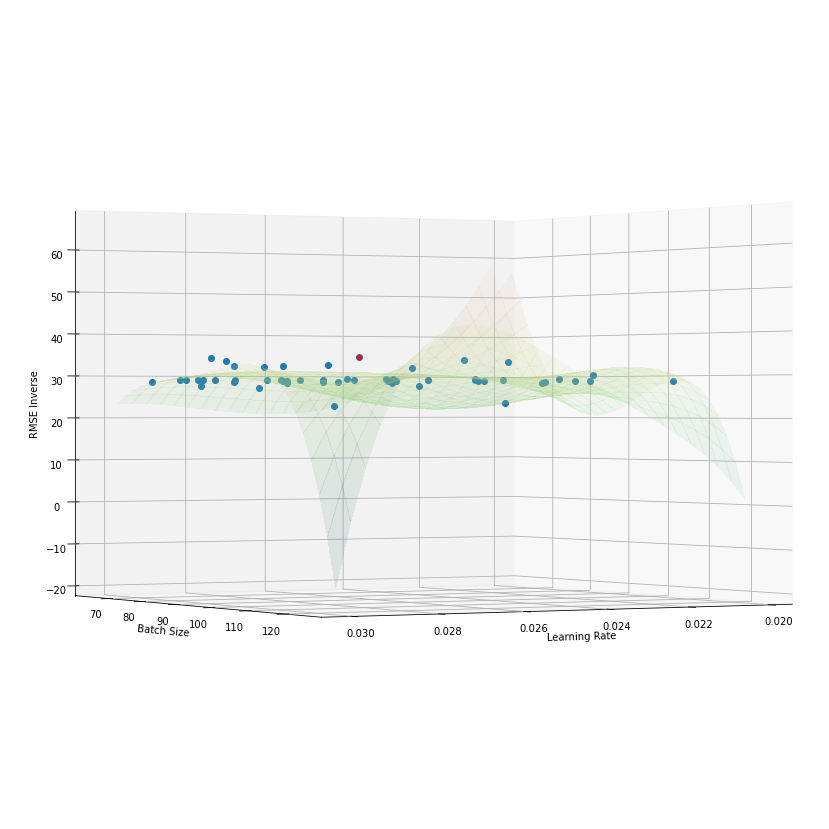

In [106]:
plot_surface(4, learning_rate_first, batch_first, rmse_inverse_first, 0, 60)

<ipython-input-68-cb3cd7a8901d>:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m = np.linalg.lstsq(G, z)[0]


<Figure size 1080x1080 with 0 Axes>

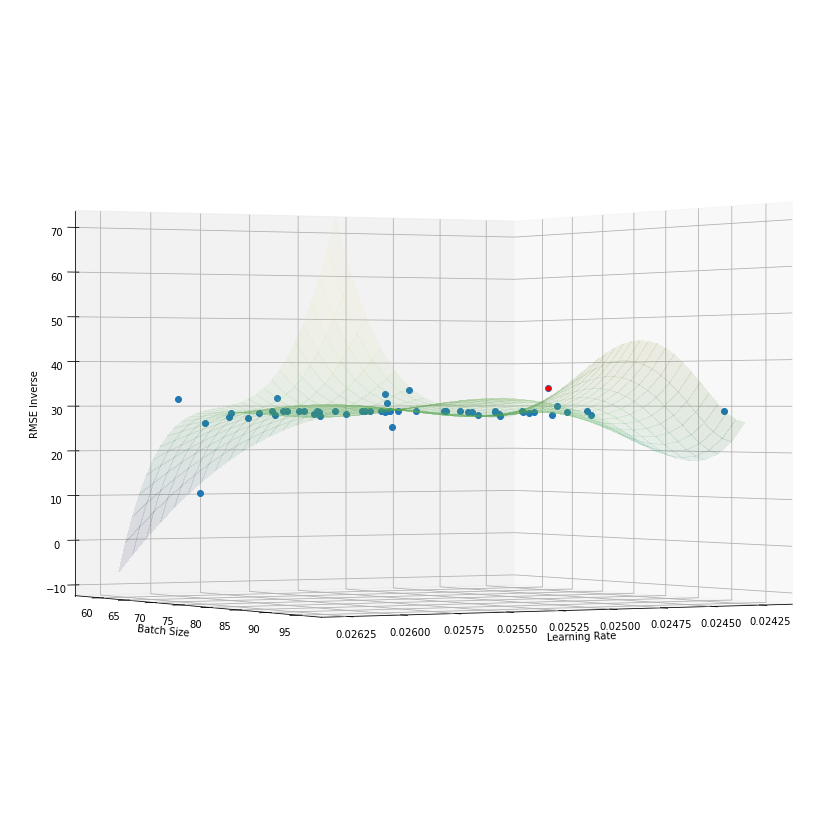

In [107]:
plot_surface(6, learning_rate_first_test, batch_first_test, rmse_inverse_first_test, 0, 60)

In [ ]:
# Group 2, learning rate 0.02-0.03, batch size 128-256

In [79]:
rmse_inverse_second = [33.83683495461864, 30.59446424904762, 32.59062512984186, 33.27991800402961, 33.52944675524357, 28.9570570545403, 28.60521872549264, 32.53150708104679, 34.53797997553491, 28.98742906431094, 28.98205877947167, 34.19833305055517, 34.25109929477178, 28.927719195211974, 33.23285073764006, 28.959908561288316, 33.26659549164874, 31.02279301869554, 31.266102172559613, 28.855810366009514, 28.842368892106823, 28.9682482287187, 28.745444630144664, 28.960076174811906, 28.929278513199677, 33.29112622729704, 28.84507667541575, 33.33733642296761, 31.888943376696105, 34.611148205125055, 28.939859890128115, 33.744749377874804, 31.87265470203683, 33.27755950974613, 33.5864230223101, 28.925513274764327, 28.974427000456867, 28.30718434728818, 28.94225113856493, 32.9142963733681, 32.33001313987801, 33.55095968661187, 28.977331424303888, 28.511074562220738, 28.884530991594236, 31.935127508727444, 31.128010901989683, 31.725535331129155, 28.891387582451948, 28.92886688393762, 28.697627948172084, 28.89361366997118, 28.936410730962653, 28.94337226731969, 30.386586688205803]
learning_rate_second = [0.02720324493442158, 0.0230233257263184, 0.02092338594768798, 0.023455607270430476, 0.025388167340033567, 0.03, 0.025226262490732027, 0.022951222772677766, 0.02032194608131121, 0.02741913496884992, 0.02778204481057432, 0.02, 0.023187807728214306, 0.024826024686419063, 0.029681639971422962, 0.03, 0.02690170973562435, 0.024132794467985462, 0.03, 0.02580024406476232, 0.024700301215417192, 0.0267822069010418, 0.028710834850836926, 0.023225029068029188, 0.027785502795617183, 0.026097204168460963, 0.027685545161228103, 0.023649869265482504, 0.02487979895010642, 0.02091263025612657, 0.022144510316109402, 0.021321144137208887, 0.020276154546936893, 0.023896816894595208, 0.022981388333726344, 0.029457878778571568, 0.028813489106521588, 0.02647749299110956, 0.024703881770821022, 0.028654814634575587, 0.02138205077200987, 0.022012568250823584, 0.028402702270658796, 0.028090163860953338, 0.025274064110697887, 0.026392842931545882, 0.022414684235866, 0.028587648965364778, 0.026697266430991424, 0.02997808314818316, 0.02400036007720855, 0.028639544236739055, 0.020164984754564408, 0.02963728849091328, 0.02186296817960046]
batch_second = [int(x) for x in [181.3788166019295, 128.01463997662015, 146.78475402459048, 151.84130705634186, 178.78623670152575, 198.40650005675852, 163.5371898847373, 255.97074095009208, 244.86133406225753, 237.62927830008843, 248.81695237016322, 243.1551553005403, 184.83825653059114, 188.34017427689804, 154.9684387887608, 175.31874575899568, 183.23671425351756, 142.94810565104166, 149.42267181543028, 157.71911401948884, 217.99869845650545, 227.83347222790474, 153.4356198268687, 244.04923877185607, 193.3241510746556, 236.04501690468294, 229.31223701940036, 129.32390189317417, 187.06463977690464, 191.28688842344536, 168.23529352619468, 240.68332399289875, 130.96880904527774, 135.97329695856646, 222.548834419397, 213.23137784995322, 156.46760429826065, 138.8740958968909, 242.58905488600467, 183.31783866719536, 131.57145990968795, 191.03160006202648, 240.93796228252097, 206.23339442796865, 136.01699240909568, 171.93958948421567, 221.083852720526, 224.19048748442162, 148.30812997359104, 165.44932494923097, 250.6546177115685, 144.80359236648343, 216.19201172076777, 214.2801107395826, 152.83034579113973]]
rmse_inverse_second_test = [32.49020350107944, 32.74514302138638, 30.757540233115726, 28.91362097235563, 28.644427703869212, 28.873930603584892, 32.45457459143796, 28.852761636013064, 28.978292027236723, 30.180601657481063, 28.74974147612085, 32.13929209911917, 28.9582188630911, 28.856034574812426, 32.32947906131317, 28.84040410027998, 28.965671659077675, 34.28097276661131, 28.975008052186872, 28.82305113106307, 28.41357549293641, 28.91894982977988, 28.93328932434997, 33.51662243699358, 31.680631383745776, 33.611221179208435, 27.380100863626588, 28.84076692122682, 32.15219383312282, 34.35769243634532, 34.098471569386504, 28.124947288944703, 32.29343512677228, 33.8435683052745, 33.07035333842904, 28.988336285821813, 33.684447420228445, 35.68120251051179, 33.55017154888597, 28.927733856682252, 28.948833633597157, 34.99713271124665, 28.833928899347494, 28.468427766577157, 33.27030058712681, 32.0562604952503, 33.743793954520086, 33.19932812881009, 28.718581721066354, 28.93577407084324, 28.746040796817216, 33.18938122893196, 28.354066961841976, 34.03826481352429, 32.43386135032957]
learning_rate_second_test = [0.021353279243010885, 0.02051729540139025, 0.020097307445664164, 0.020603751710212663, 0.020990263724133283, 0.020846168115565493, 0.02123290609044407, 0.021170253784132096, 0.0214300129312517, 0.02023554659983581, 0.02080703075535251, 0.021241206430558757, 0.020162169735821894, 0.02131672665503296, 0.020725997621015027, 0.020493633839275202, 0.0219045519783051, 0.021427981659825436, 0.02084035490906267, 0.021280838778944374, 0.020356012704039403, 0.021577907041883396, 0.020662388568927482, 0.021578282735536077, 0.021469730815250006, 0.021132071089818762, 0.02144973928837219, 0.020634325990259123, 0.020888590046147855, 0.020095156307351883, 0.02034153231934845, 0.020176859083568345, 0.021415258311717318, 0.020691993635045612, 0.02163710681676244, 0.02019888054156804, 0.02167532807743089, 0.02171327363253944, 0.02068492825918922, 0.021814393558986015, 0.02036037818219108, 0.021761728993822754, 0.021650868966719236, 0.021153388881031056, 0.020967443078266146, 0.020662056959215615, 0.020937297711634464, 0.02144560078927602, 0.021034476882949047, 0.021270691816832027, 0.021454289926780626, 0.020441807653798615, 0.01994562720703945, 0.02112356756455384, 0.021485727544755445]
batch_second_test = [int(x) for x in [187.9677686115483, 171.29146341613915, 177.15712405612987, 178.7372968785522, 187.15758739267216, 187.98503864466315, 204.48696473893804, 177.25915695039455, 174.72977234468948, 187.11198490983583, 206.7947696657057, 187.96762940627957, 204.48806321764766, 193.4149408750678, 177.22468221477178, 171.2925548541336, 187.96993404281122, 177.2256150039489, 177.22656782064374, 178.00994522210044, 171.29086110508857, 177.22553093954178, 171.7265121944682, 180.06623279629113, 191.70068563427523, 205.0509562061588, 202.94696249200797, 177.2247989222428, 189.74458835372806, 191.06404105577204, 183.8604176503812, 206.50042717122622, 187.9678688313771, 173.77854372299737, 187.9677624700181, 189.74471017994594, 180.1830147666518, 187.9677354895454, 171.29122053037295, 187.96771832308949, 183.86003401935912, 180.06638536547692, 191.70057591416514, 173.77840001495596, 173.79219855128775, 173.77897910729726, 180.06597396970835, 191.70141968719747, 173.79210616384103, 180.06542446865916, 180.0669285532241, 180.06619309776553, 198.84689208618528, 187.96789391634616, 205.05116403961262]]

<ipython-input-68-cb3cd7a8901d>:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m = np.linalg.lstsq(G, z)[0]


<Figure size 1080x1080 with 0 Axes>

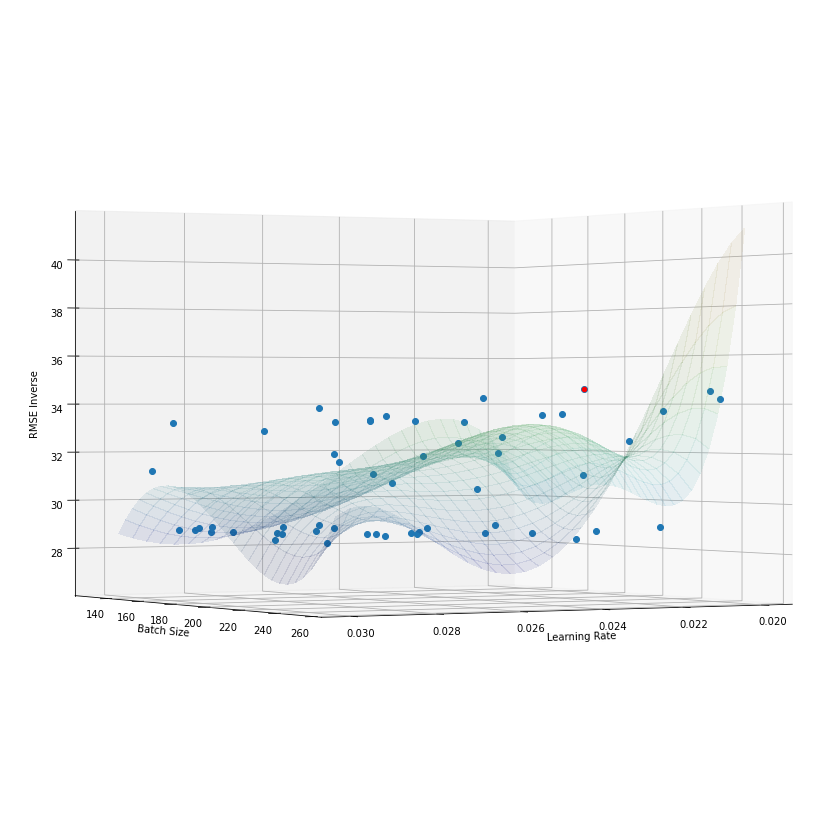

In [80]:
plot_surface(4, learning_rate_second, batch_second, rmse_inverse_second, 0, 60)

<ipython-input-68-cb3cd7a8901d>:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m = np.linalg.lstsq(G, z)[0]


<Figure size 1080x1080 with 0 Axes>

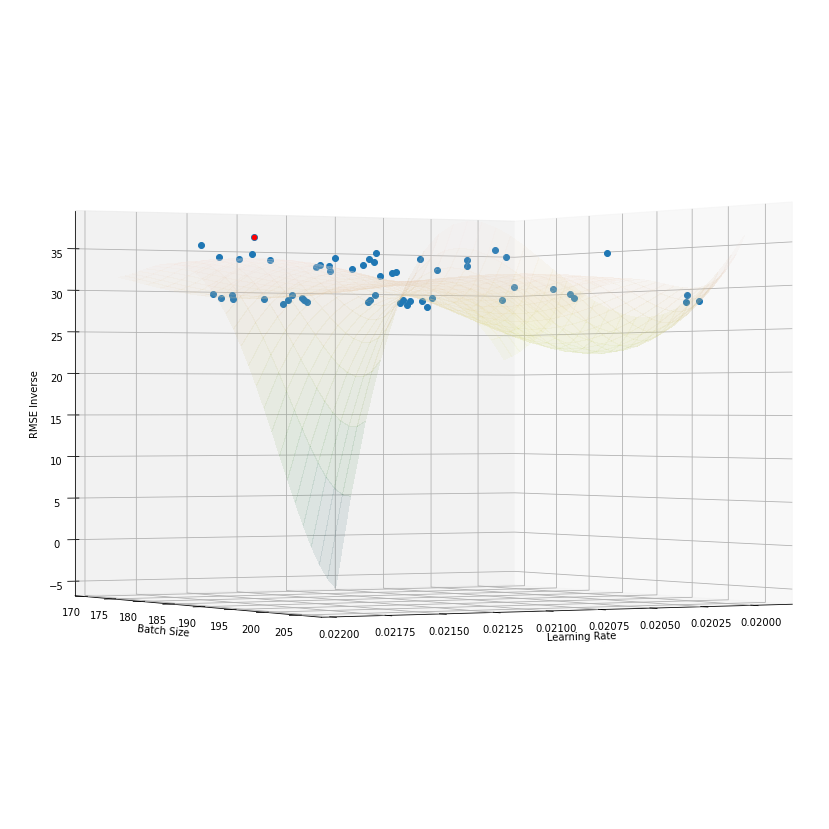

In [81]:
plot_surface(6, learning_rate_second_test, batch_second_test, rmse_inverse_second_test, 0, 60)

In [ ]:
# Group 3, learning rate 0.03-0.04, batch size 64-128

In [83]:
rmse_inverse_third = [28.574051958088948, 27.98682803440051, 28.870166700013964, 25.69816159313579, 28.105274860713973, 28.461245248088932, 28.204238299262553, 28.916140524243193, 28.907589912024548, 32.43125257031901, 28.91082729505392, 30.791292980278254, 27.045109930872773, 28.70175775478497, 28.89964417976294, 28.128551940019882, 28.886830522572907, 28.875375959547572, 28.849174516399312, 21.45405523388468, 28.387698091223964, 27.78174994398383, 28.986915422188915, 28.51156472459566, 28.52474297132086, 28.43718906904097, 27.955287567256683, 28.94293940081464, 28.656290697635495, 28.988253938459195, 28.248810930260056, 33.087281645168396, 28.80812745038254, 28.883595887998776, 28.37632414260292, 28.834442421515238, 27.681323948453844, 28.872539901258943, 28.876653417836717, 28.989571147294576, 28.342995673029453, 28.73969349218427, 28.969238177571977, 28.971393806691914, 28.680631985634093, 28.98928937133012, 28.980970471640134, 28.938911141652998, 27.739560773398644, 28.921993934459884, 28.985174080762164, 28.06263856236903, 28.653815891883635, 32.69082065643189, 28.797924881108397]
learning_rate_third = [0.03720324493442158, 0.0330233257263184, 0.030923385947687978, 0.033455607270430475, 0.03538816734003357, 0.03201937758733733, 0.036464295490624826, 0.03995743368778422, 0.039008246117231436, 0.03293625687721511, 0.03, 0.030180693718067572, 0.03409790261235773, 0.037020481994531944, 0.034066836824442295, 0.033814683445827214, 0.032748939351076124, 0.03673457486681595, 0.03416067618701094, 0.03684104261408902, 0.03399897674391201, 0.03627158927684146, 0.03374879156400456, 0.03832826239704753, 0.03778550279561718, 0.03609720416846096, 0.0376855451612281, 0.0336498692654825, 0.03487979895010642, 0.030912630256126568, 0.032144510316109404, 0.031321144137208885, 0.03027615454693689, 0.03389681689459521, 0.03298138833372634, 0.03945787877857157, 0.03881348910652159, 0.03647749299110956, 0.034703881770821024, 0.03865481463457559, 0.03138205077200987, 0.03456607020179764, 0.0384027022706588, 0.03809016386095334, 0.03527406411069789, 0.036392842931545884, 0.032414684235866, 0.038587648965364776, 0.03669726643099143, 0.03997808314818316, 0.03400036007720855, 0.03863954423673906, 0.030164984754564406, 0.03963728849091328, 0.03186296817960046]
batch_third = [int(x) for x in [90.68940830096474, 64.00731998831007, 73.39237701229524, 75.92065352817093, 89.39311835076288, 72.40670874615385, 92.46011001942297, 95.3423775155768, 96.78925013138323, 98.73017886191641, 99.67142027877738, 98.42786669256216, 99.00514596160826, 99.40488392259589, 73.50047006612226, 98.73482232414065, 85.70872864997332, 76.22033274718517, 122.22544759172087, 74.75689087784812, 109.88839544414829, 69.10313191136711, 64.70339803363655, 78.04695099655324, 96.6620755373278, 118.02250845234147, 114.65611850970018, 64.66195094658708, 93.53231988845232, 95.64344421172268, 84.11764676309734, 120.34166199644937, 65.48440452263887, 67.98664847928323, 111.2744172096985, 106.61568892497661, 78.23380214913033, 69.43704794844545, 121.29452744300234, 91.65891933359768, 65.78572995484397, 123.26177955379552, 120.46898114126049, 103.11669721398432, 68.00849620454784, 85.96979474210784, 110.541926360263, 112.09524374221081, 74.15406498679552, 82.72466247461549, 125.32730885578425, 72.40179618324171, 108.09600586038388, 107.1400553697913, 76.41517289556987]]
rmse_inverse_third_test = [31.15525757825445, 28.102590145194995, 28.084606699298973, 31.396425238972775, 32.34819995173742, 27.104213615647794, 28.819415726583834, 28.989204419666883, 28.36961582732312, 28.67600370003247, 28.30662647436185, 28.599207315326247, 28.67436133247024, 27.814299459125017, 28.645997367874095, 33.121558070646095, 28.800072822821424, 28.26543889845226, 28.93784334283119, 28.438144210000218, 27.99686970373201, 28.917711526466565, 28.736205388278513, 28.980561082884115, 27.710576053462912, 28.915376322835026, 28.957040255955718, 28.777068451277678, 28.81027819022473, 28.773746633114882, 28.982097522695838, 33.28206366093759, 28.855002451160964, 26.961593282828165, 28.963487018402446, 28.97140959899416, 28.802489059095134, 24.928438706222803, 31.326355157666143, 28.658321778626597, 32.39476352086025, 30.150858321692628, 28.865559793597402, 28.766423331628566, 28.82238310795773, 28.89790858597054, 28.875938977401976, 28.60974697989818, 28.522697503059984, 28.48296617135205, 28.81862373494701, 28.647236608228347, 32.11174189643035, 28.794997623109374, 28.440557653569087]
learning_rate_third_test = [0.031761793124093204, 0.030925809282472565, 0.03050582132674648, 0.03101226559129498, 0.0313987776052156, 0.03195465990437672, 0.03143897624404153, 0.03157876766521441, 0.03214534870630318, 0.030644060480918126, 0.031215544636434826, 0.031025183379181556, 0.03110689553015271, 0.03172524053611527, 0.031134511502097343, 0.03138971787563825, 0.03087093200742411, 0.031237781916151047, 0.031153279374611074, 0.03168935266002669, 0.031120939485991286, 0.03157546199257718, 0.031070902450009798, 0.03198679661661839, 0.031878244696332325, 0.03154058497090108, 0.03185825316945451, 0.031051117990305386, 0.03129710392723017, 0.0305036701884342, 0.030750046200430765, 0.03058537296465066, 0.03182377219279963, 0.031100507516127928, 0.030917421803954154, 0.0322127198929232, 0.0320838419585132, 0.03132699021458898, 0.03126192049137309, 0.032052107064124, 0.03059755429161086, 0.03123435817756841, 0.032001684591340646, 0.031939176909399555, 0.031375956959348465, 0.031447657818703026, 0.030804080984382084, 0.03203867393028184, 0.031409056245108244, 0.03231676076684552, 0.031121216152650597, 0.032049052984556695, 0.030354141088121765, 0.03224860183539154, 0.030693737773128976]
batch_third_test = [int(x) for x in [117.02254218455234, 100.34623698914316, 106.2118976291339, 107.79207045155621, 116.21236096567617, 115.31682217210712, 116.47015394405403, 106.31393052339855, 116.08900034786974, 116.16675848283982, 135.8495432387097, 117.6334287560855, 124.73764246270244, 122.46971444807181, 106.27945578777579, 103.01395825010081, 113.9096174026827, 103.00900994384772, 136.73256674127492, 107.06471879510445, 129.02190914904205, 103.53111944105383, 100.78128576747223, 109.12100636929515, 120.75545920727924, 134.1057297791628, 132.00173606501198, 100.7553813380663, 118.79936192673208, 120.11881462877605, 112.91519122338521, 135.55520074423023, 117.02264240438112, 102.8333172960014, 129.88817275251094, 126.97646757455976, 109.23778833965582, 103.01383860811215, 136.15074164832583, 117.62848657994793, 101.45774321822685, 137.38027421757158, 135.63477520973717, 124.78959775518958, 102.84697212429177, 103.0138824959841, 129.43036597161375, 130.40118933533114, 136.1508178183962, 112.04457604308405, 138.67123003131454, 105.59278461097544, 127.90166565918929, 127.30419660256894, 108.10114505618054]]

<ipython-input-68-cb3cd7a8901d>:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m = np.linalg.lstsq(G, z)[0]


<Figure size 1080x1080 with 0 Axes>

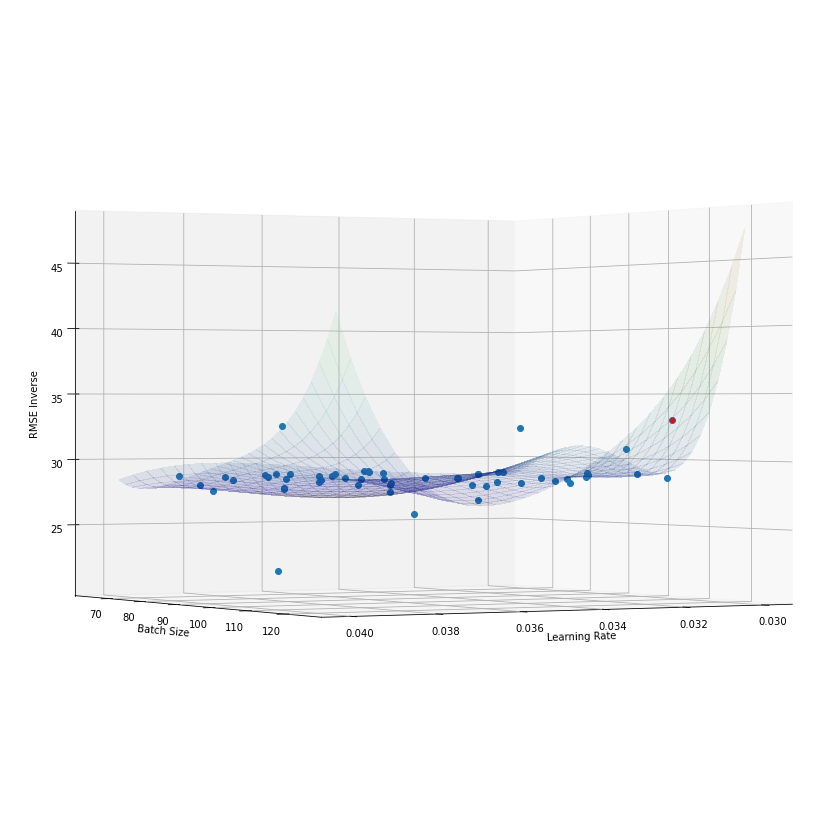

In [84]:
plot_surface(4, learning_rate_third, batch_third, rmse_inverse_third, 0, 60)

<ipython-input-68-cb3cd7a8901d>:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m = np.linalg.lstsq(G, z)[0]


<Figure size 1080x1080 with 0 Axes>

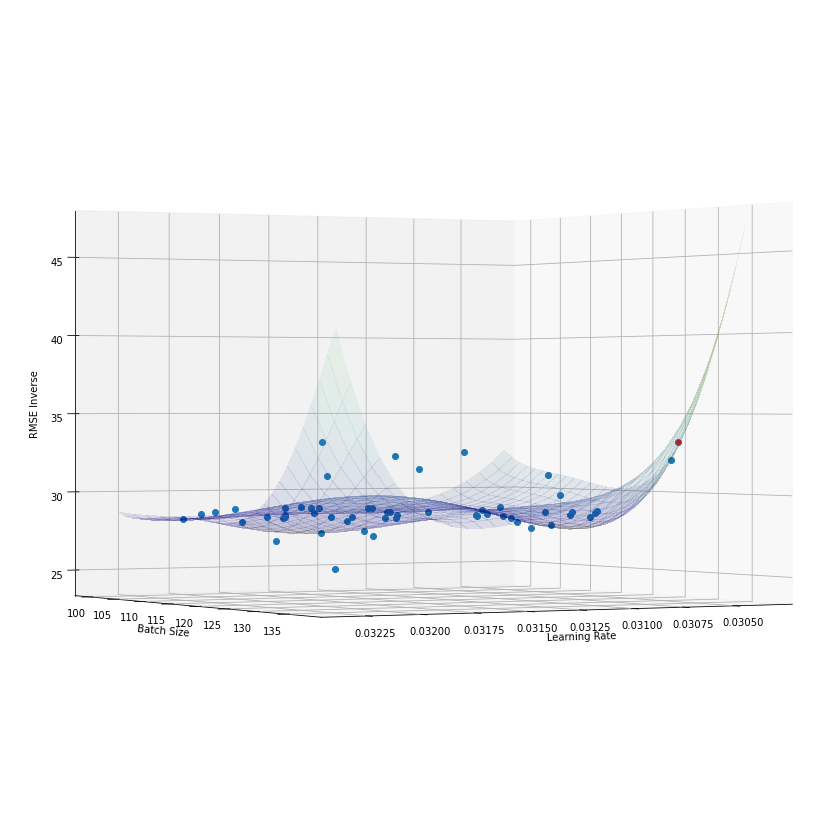

In [140]:
plot_surface(6, learning_rate_third_test, batch_third_test, rmse_inverse_third_test, 0, 60)

In [ ]:
# Group 4, learning rate 0.03-0.04, batch size 128-256

In [87]:
rmse_inverse_fourth = [28.961265962172813, 28.96355982964731, 28.68894734074426, 28.51473481950761, 28.815304798103234, 28.988983007245423, 30.651431034908548, 28.81139180704164, 28.94839761178263, 28.647730102773984, 28.985045706339218, 31.481328920830673, 28.959976894195798, 28.950736187775973, 28.989610799748817, 28.984336902498246, 28.989351766569683, 32.768881372728984, 28.987211941985883, 28.958341097662526, 33.093592428602506, 28.4814577481987, 28.59058739358705, 28.648030355793164, 28.92716508834396, 28.94384025908351, 28.98953666644354, 28.95260823402869, 28.685320212745623, 33.02955182686943, 28.856303625184708, 31.869755219041902, 28.599821582218915, 28.58563548637867, 33.453402180324375, 32.7121603001645, 28.512656243102253, 31.04041746277005, 31.94946467488734, 28.904527430284652, 28.807442669295167, 28.958497651887274, 28.953539302017695, 28.07090072347039, 28.935202250255745, 33.722876293016895, 28.976248966819327, 28.677793152877786, 34.99436783429374, 28.88619631489732, 28.90642789462819, 28.642419169537334, 32.36567123082256, 28.70357142471666, 28.87383523232194]
learning_rate_fourth = [0.03720324493442158, 0.0330233257263184, 0.030923385947687978, 0.033455607270430475, 0.03538816734003357, 0.03479074500835936, 0.03, 0.03447634027669317, 0.03758691337562565, 0.039306952575330394, 0.03447200249612971, 0.03352019620986336, 0.03225880708462524, 0.037020481994531944, 0.034066836824442295, 0.0353428686921468, 0.032748939351076124, 0.03673457486681595, 0.03416067618701094, 0.03684104261408902, 0.03399897674391201, 0.03627158927684146, 0.03374879156400456, 0.03832826239704753, 0.03778550279561718, 0.03609720416846096, 0.0376855451612281, 0.0336498692654825, 0.03487979895010642, 0.030912630256126568, 0.032144510316109404, 0.031321144137208885, 0.03027615454693689, 0.03389681689459521, 0.03298138833372634, 0.03945787877857157, 0.03881348910652159, 0.03647749299110956, 0.034703881770821024, 0.03865481463457559, 0.03138205077200987, 0.03456607020179764, 0.0384027022706588, 0.03809016386095334, 0.03527406411069789, 0.036392842931545884, 0.032414684235866, 0.038587648965364776, 0.03669726643099143, 0.03997808314818316, 0.03400036007720855, 0.03863954423673906, 0.030164984754564406, 0.03963728849091328, 0.03186296817960046]
batch_fourth = [int(x) for x in [181.3788166019295, 128.01463997662015, 146.78475402459048, 151.84130705634186, 178.78623670152575, 186.06550872333077, 135.06362957716243, 138.1874973233476, 139.01722854798123, 134.1861975407415, 241.6252199752331, 183.3336536308356, 183.3410314633063, 198.80976784519177, 147.00094013224452, 136.5513480116846, 171.41745729994665, 152.44066549437034, 244.45089518344173, 149.51378175569624, 219.77679088829657, 138.20626382273423, 129.4067960672731, 156.09390199310647, 193.3241510746556, 236.04501690468294, 229.31223701940036, 129.32390189317417, 187.06463977690464, 191.28688842344536, 168.23529352619468, 240.68332399289875, 130.96880904527774, 135.97329695856646, 222.548834419397, 213.23137784995322, 156.46760429826065, 138.8740958968909, 242.58905488600467, 183.31783866719536, 131.57145990968795, 246.52355910759104, 240.93796228252097, 206.23339442796865, 136.01699240909568, 171.93958948421567, 221.083852720526, 224.19048748442162, 148.30812997359104, 165.44932494923097, 250.6546177115685, 144.80359236648343, 216.19201172076777, 214.2801107395826, 152.83034579113973]]
rmse_inverse_fourth_test = [28.904153147677082, 28.987776699694837, 27.86686250565207, 28.889084257788284, 25.70961691242109, 28.98206774198929, 28.88320297905528, 28.940736350930464, 26.894917049221245, 28.96208973235085, 28.802615941101386, 28.989589589916587, 28.776913681176406, 27.65376442929577, 28.989251461521857, 28.98811249791855, 28.513233839552086, 28.900464703545698, 28.9246346326511, 28.985359985328813, 28.91552945605165, 28.65095093592945, 33.08345515553501, 28.239422341619406, 32.4517616937948, 27.770241865737667, 32.796211350194746, 28.72102595492309, 26.90835960499505, 23.314056270518048, 28.53839629250666, 28.093746030959856, 28.92617934548658, 27.9335021335175, 28.964371789772414, 27.61605140524458, 28.980092225861565, 28.741693066593854, 28.272180591388803, 27.585289685323772, 28.792953440026753, 28.76639059171471, 28.942631420465833, 28.964790446830374, 28.93900313532127, 28.640718568462297, 28.831704154368342, 28.898992712799377, 28.664835180321266, 28.74108667853795, 32.44313132467127, 28.41002598916739, 28.808421365011384, 28.87558158325428, 32.383172376177846]
learning_rate_fourth_test = [0.03713791541787575, 0.03630193157625511, 0.035881943620529023, 0.036388387885077526, 0.03677489989899815, 0.036389054618838804, 0.036951305602758715, 0.0365584851976709, 0.03569726643099143, 0.03665339369225422, 0.03622235751409673, 0.037103822901417685, 0.03623300860641065, 0.0369200598857897, 0.03569726643099143, 0.03583829365902012, 0.03769726643099143, 0.036992838066074646, 0.036889219718160414, 0.03701863133580227, 0.03625646227078248, 0.03711958228973231, 0.03677222109015931, 0.03650904126279511, 0.03668065051336671, 0.037345102246244904, 0.03723437546323705, 0.03642724028408793, 0.03667322622101271, 0.036673372916422045, 0.03636692831954429, 0.03596149525843321, 0.037199894486582175, 0.03647662980991047, 0.0362935440977367, 0.037588842186705745, 0.037459964252295745, 0.036992765029213344, 0.03631747254423773, 0.037428229357906545, 0.0359736765853934, 0.03661048047135096, 0.03737780688512319, 0.03714129990006086, 0.03675207925313101, 0.036975835017300604, 0.03618020327816463, 0.037414796224064385, 0.03681911305781391, 0.03769288306062806, 0.03649733844643314, 0.03742517527833924, 0.03573026338190431, 0.037624724129174086, 0.03606986006691152]
batch_fourth_test = [int(x) for x in [144.989010161694, 128.31270496628483, 134.17836560627555, 135.75853842869788, 144.17882894281783, 128.3180543612487, 145.62408274697194, 136.60373380669688, 137.49547368566766, 146.49389559167844, 147.2591931875574, 148.18957237646887, 148.96874461330077, 149.974367055662, 129.76123614180807, 130.49004390449102, 131.30813586911586, 162.95403457071328, 162.15930819597878, 161.3247280021813, 160.52882396992248, 159.6403071432584, 163.83960887910243, 164.12459850890923, 146.49543174979462, 148.18921808629818, 159.96820404215364, 128.72184931520798, 146.76582990387374, 146.49392297082855, 128.3181547831386, 163.5216687213719, 144.98911038152278, 130.79978527314304, 157.8546407296526, 154.94293555170142, 137.20425631679748, 131.70628494136943, 128.31809019690618, 145.59495455708958, 129.4242111953685, 165.34674219471324, 163.60124318687883, 159.96822574707807, 130.81344010143343, 142.03925168740844, 157.39683394875541, 158.3676573124728, 130.8133477139867, 140.0110440202257, 166.6376980084562, 133.5592525881171, 155.86813363633095, 155.2706645797106, 136.0676130333222]]

<ipython-input-68-cb3cd7a8901d>:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m = np.linalg.lstsq(G, z)[0]


<Figure size 1080x1080 with 0 Axes>

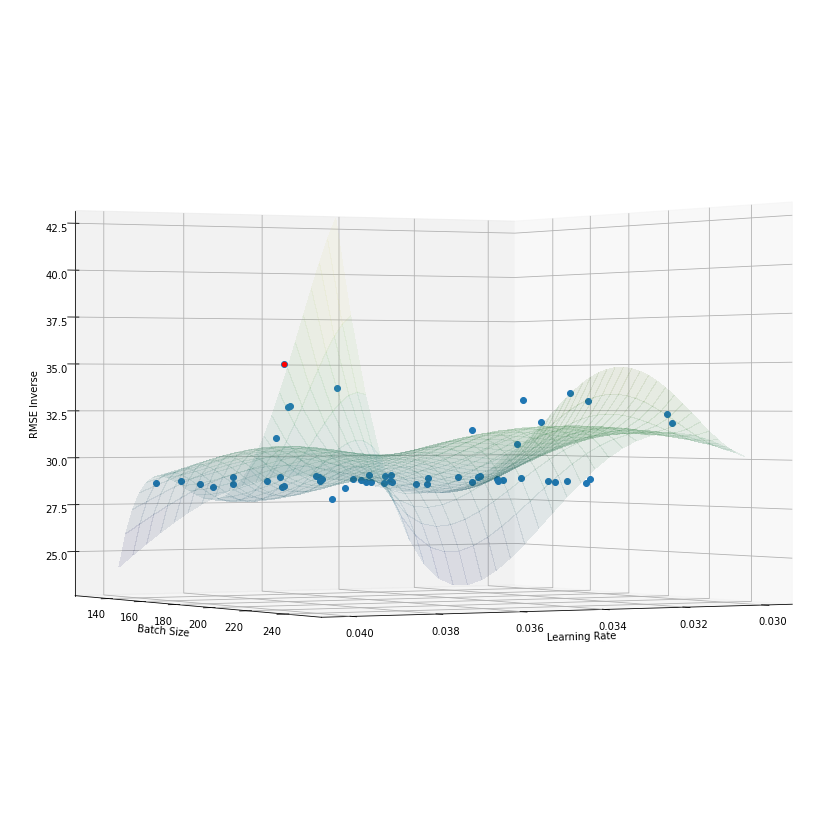

In [88]:
plot_surface(4, learning_rate_fourth, batch_fourth, rmse_inverse_fourth, 0, 60)

<ipython-input-68-cb3cd7a8901d>:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m = np.linalg.lstsq(G, z)[0]


<Figure size 1080x1080 with 0 Axes>

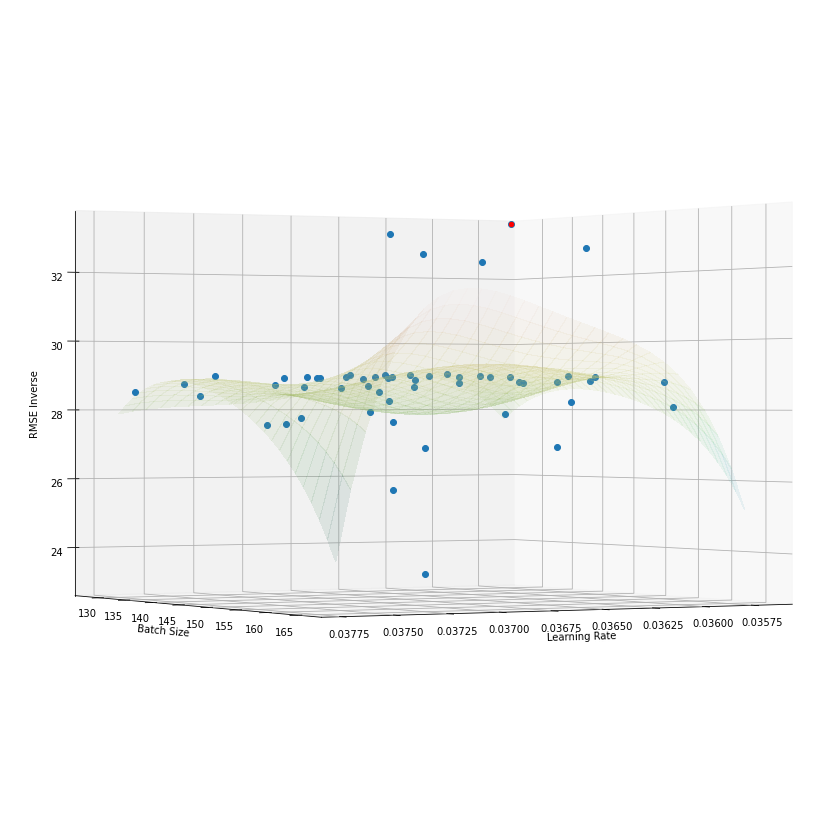

In [92]:
plot_surface(6, learning_rate_fourth_test, batch_fourth_test, rmse_inverse_fourth_test, 0, 60)

In [ ]:
# Group 5, learning rate 0.04-0.05, batch size 64-128

In [108]:
rmse_inverse_fifth = [28.585191747769944, 28.651280832746256, 28.64243602165244, 27.43164335771186, 28.87844440467118, 28.960872119891732, 28.44508137438829, 28.519349079288165, 28.988743053663363, 28.100772623860344, 28.85735807962448, 28.930229543920994, 27.440285652176865, 28.98925283370328, 27.92311249014004, 26.08350352737849, 27.956402562811874, 28.636738163591737, 28.66867879284145, 27.67227773175269, 28.087434289499974, 28.989328973609577, 28.848475327551352, 28.755068931741565, 31.7044893242364, 29.866983026785647, 28.52496596477887, 27.94732330087526, 28.84272103969076, 28.95676803187535, 27.503818692447084, 28.469658166824136, 28.54339248726048, 28.944063819819107, 28.915817254120316, 28.989278636875422, 2.976615958032124, 28.98135487405113, 28.981482513474628, 33.121265198024126, 26.976513926932245, 28.93760976759893, 28.66696196049099, 28.531178358603583, 28.74711274228852, 28.72740583330976, 28.80401645301268, 22.937140453798516, 28.976717995805497, 28.988577459889438, 28.305178310615016, 28.655209533032416, 28.953226187425905, 28.779268174997906, 28.644144070779294]
learning_rate_fifth = [0.04720324493442159, 0.043023325726318395, 0.040923385947687976, 0.04345560727043048, 0.04538816734003357, 0.04788327005034417, 0.04, 0.049009201605228536, 0.04367221211396992, 0.045823526121132385, 0.049334735160522086, 0.04191786246380168, 0.04258827893458221, 0.047166915888554914, 0.04905499226024472, 0.040617471752869366, 0.04, 0.05, 0.04, 0.043883241754409816, 0.04, 0.04321682129379825, 0.05, 0.04, 0.0438764742306454, 0.04, 0.040490479384885945, 0.043649869265482505, 0.04487979895010642, 0.04091263025612657, 0.042144510316109406, 0.04132114413720889, 0.04027615454693689, 0.04389681689459521, 0.04298138833372635, 0.049457878778571565, 0.04881348910652159, 0.04686365990675361, 0.04833165465225611, 0.04188014856370595, 0.04964956035781228, 0.043352082238033066, 0.0484027022706588, 0.04, 0.04385044045630085, 0.04622664600778968, 0.0490342290683829, 0.05, 0.0408898607122079, 0.04633206924953261, 0.045905612768618556, 0.05, 0.048742958582903194, 0.042785361963773715, 0.05]
batch_fifth = [int(x) for x in [90.68940830096474, 64.00731998831007, 73.39237701229524, 75.92065352817093, 89.39311835076288, 87.95315381689757, 70.57038552684526, 85.55186756803184, 122.63168647411027, 120.66617156796019, 123.78590771808699, 126.29487655935563, 127.99421306068994, 125.27262668957803, 66.3221785846983, 104.72165131524937, 95.95085712906628, 113.35061379584172, 116.16050994881138, 81.78177532170442, 110.49125647491907, 99.52541239508648, 100.99998772379982, 93.07178642811596, 118.00609196076766, 118.53344902219116, 117.71740470315865, 64.66195094658708, 93.53231988845232, 95.64344421172268, 84.11764676309734, 120.34166199644937, 65.48440452263887, 67.98664847928323, 111.2744172096985, 106.61568892497661, 78.23380214913033, 108.24261563644623, 114.81778586029247, 102.56165425472962, 103.31694992028517, 101.94638590469873, 120.46898114126049, 98.07542571913332, 72.00237225645294, 69.2256510978279, 86.78373367550158, 74.59485852919447, 94.61101240547009, 91.85405611316031, 112.29781791578603, 109.29106910355213, 80.55559753623727, 82.95408051230294, 97.12561018274201]]
rmse_inverse_fifth_test = [28.988466284283945, 28.704912468317204, 28.988084440196705, 28.58601724837162, 28.963242634795737, 28.790180718221198, 28.725382617960687, 28.499560936555355, 28.989613841784934, 25.97516597680683, 28.980057671561156, 27.567905965189112, 32.59733456805839, 28.988755761029577, 28.75888028375269, 28.463651914161318, 28.871733454908608, 28.831039838712066, 28.920286887531844, 28.985518667326293, 27.189636897172054, 26.18968870036881, 28.955479897907992, 28.946489429590645, 27.55385948388004, 32.6050745272453, 26.880693998442837, 28.395062523182578, 26.36389112273997, 28.97672569161115, 28.868970171332066, 28.853949347989637, 28.771073148264268, 28.741170009555432, 28.967227935921606, 28.376843436908825, 28.831749340726173, 28.9510996270374, 28.82311506293945, 28.10979968520597, 28.38979116993733, 28.88807531043802, 33.61048726221166, 28.901481539046717, 31.329180458012395, 28.94581809858388, 28.437162591846565, 28.926515094680898, 28.796474176189097, 27.525054076517566, 28.75990050456376, 28.763914293054068, 28.945961409161534, 28.977071332836008, 28.9489876077261]
learning_rate_fifth_test = [0.04232079755059027, 0.04148481370896963, 0.04106482575324354, 0.041571270017792046, 0.041957782031712666, 0.04088014856370595, 0.04194786823612597, 0.04285188819004375, 0.04239753123883108, 0.04120306490741519, 0.04177454906293189, 0.041106348742875054, 0.042169336036274124, 0.042284244962612336, 0.04169351592859441, 0.04218508058536022, 0.04142993643392118, 0.04222706353706914, 0.041712283801108134, 0.042248357086523754, 0.04273166227404012, 0.040999102426738966, 0.04162990687650686, 0.04254580104311546, 0.04243724912282939, 0.04209958939739814, 0.04241725759595157, 0.0416018442978385, 0.042371018032647645, 0.04106267461493126, 0.04186154901997941, 0.04114437739114773, 0.042382776619296694, 0.04165951194262499, 0.04260462512434182, 0.042771724319420265, 0.042642846385010265, 0.04268079194011882, 0.04175838610966483, 0.042781911866565395, 0.040977780300045646, 0.04272924730140213, 0.04256068901783771, 0.04249818133589662, 0.04191842916626857, 0.04229478658085734, 0.04179012657944841, 0.04246218207964206, 0.04221960184990423, 0.04287576519334258, 0.04242180823436, 0.042520608369383574, 0.04218567310616981, 0.04209108587213322, 0.04125274219962604]
batch_fifth_test = [int(x) for x in [99.24253444283258, 82.56622924742341, 88.43188988741414, 90.01206270983646, 98.43235322395641, 87.49387628857262, 99.98915742526704, 99.24444602180951, 86.00453817597375, 98.38675074112007, 118.06953549698997, 99.23541879153747, 99.24290425813786, 104.68970670635204, 88.49944804605603, 104.69028861126186, 96.12960966096296, 90.19936222172035, 118.95255899955515, 89.2847110533847, 98.43236688204892, 88.43172984735952, 83.00127802575247, 91.34099862757539, 102.97545146555949, 116.32572203744303, 114.22172832329224, 88.49956475352707, 90.19935564878264, 102.3388068870563, 99.98907607074676, 117.77519300251048, 99.24263466266135, 85.05330955428164, 99.24252830130237, 109.19645983283999, 91.45778059793606, 99.24250132082965, 83.00109109835284, 99.24248415437373, 82.56643840045255, 91.34115119676119, 117.85476746801741, 107.00959001346982, 117.85437083036477, 91.34160607425277, 91.3415011875365, 89.2851851306662, 88.90794487147681, 94.26456830136429, 91.34169438450837, 117.8552531410271, 91.34049315778286, 99.24265974763043, 90.32113731446078]]

In [109]:
# remove one outlier point
minlearning = min(rmse_inverse_fifth)
xmin = learning_rate_fifth[rmse_inverse_fifth.index(minlearning)]
ymin = batch_fifth[rmse_inverse_fifth.index(minlearning)]
learning_rate_fifth.remove(xmin)
batch_fifth.remove(ymin)
rmse_inverse_fifth.remove(minlearning)

<ipython-input-68-cb3cd7a8901d>:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m = np.linalg.lstsq(G, z)[0]


<Figure size 1080x1080 with 0 Axes>

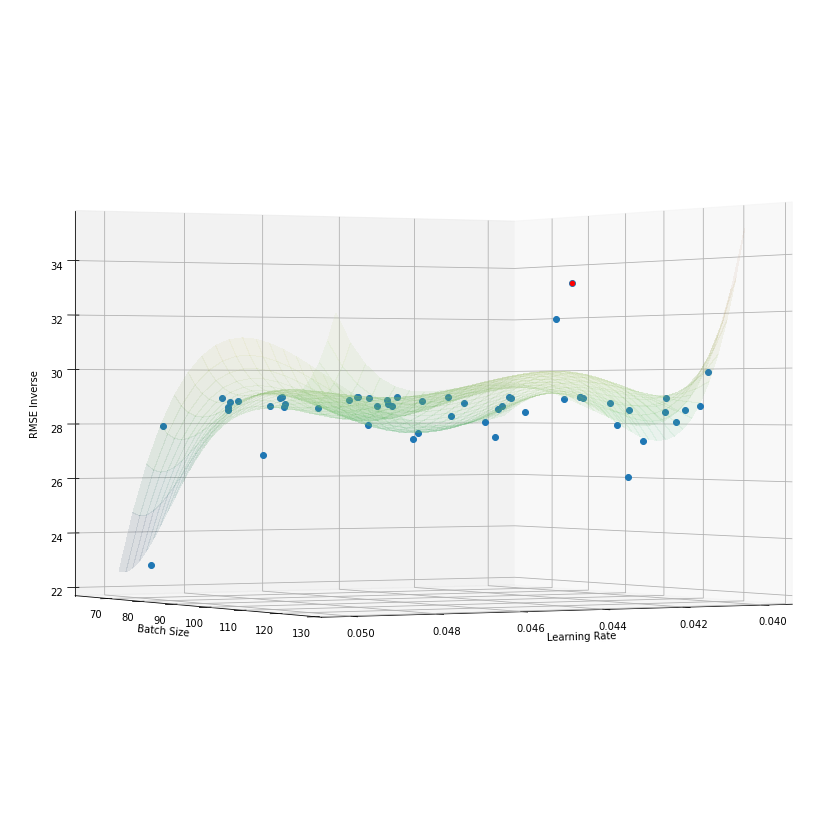

In [110]:
plot_surface(4, learning_rate_fifth, batch_fifth, rmse_inverse_fifth, 0, 60)

<ipython-input-68-cb3cd7a8901d>:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m = np.linalg.lstsq(G, z)[0]


<Figure size 1080x1080 with 0 Axes>

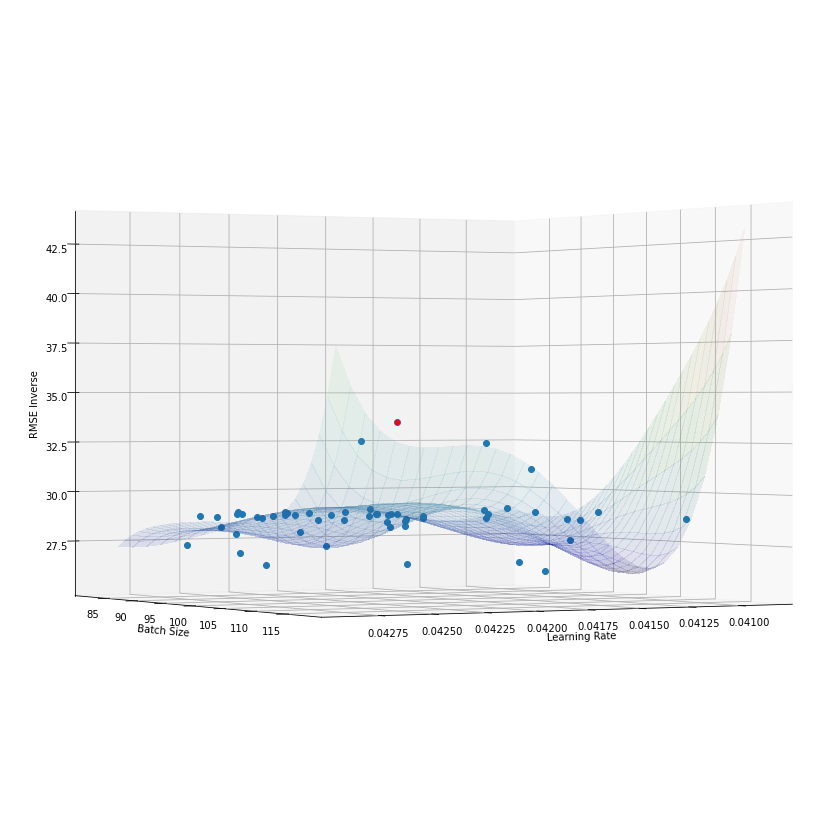

In [111]:
plot_surface(6, learning_rate_fifth_test, batch_fifth_test, rmse_inverse_fifth_test, 0, 60)

In [ ]:
# Group 6, learning rate 0.04-0.05, batch size 128-256

In [113]:
rmse_inverse_sixth = [28.88621900899112, 28.843141387479292, 28.98437493775448, 28.61688734997081, 28.232557271117393, 27.914889098205908, 28.973840987360973, 27.78915397841623, 28.597508867444702, 28.96055674753971, 28.959603694037362, 28.656654638169066, 28.437996973989513, 27.466707089228056, 32.04218720383687, 28.565540878680824, 27.989418429268873, 28.86444572433627, 28.98666803589214, 28.309715279592435, 28.78904091986042, 28.604642628131167, 28.712135954815984, 28.579025386595653, 28.864584196687797, 26.957446031953594, 31.722442962053297, 28.490801882037662, 28.98399448213151, 29.51731802548917, 28.793520460489635, 28.798223428615735, 31.854403930215934, 28.43682422816446, 28.97207367231172, 28.244095695141382, 28.440936409128245, 28.211073086100075, 28.916133262488415, 28.989303220096335, 28.796279581515485, 28.412473582128516, 28.986689911494775, 28.442242141661666, 28.978477228022484, 31.66286007368619, 28.543214622009092, 28.717064232629987, 28.95200462468771, 28.984629671583967, 28.970607150266783, 28.587067719346344, 28.88975087434183, 28.321404963307312, 28.546327595389503]
learning_rate_sixth = [0.04720324493442159, 0.043023325726318395, 0.040923385947687976, 0.04345560727043048, 0.04538816734003357, 0.04368879169973435, 0.048564851019971586, 0.04862183763857458, 0.044321095340445225, 0.04932390269475751, 0.04447200249612971, 0.04722410442246506, 0.04773003710977532, 0.047020481994531946, 0.0440668368244423, 0.040258121787296305, 0.04680247373354966, 0.04757675701849434, 0.04453787360405801, 0.04684104261408902, 0.043205893494253064, 0.04690770350205996, 0.04214450441820735, 0.04832826239704753, 0.04131371502593604, 0.04469534141470271, 0.0476855451612281, 0.043649869265482505, 0.04487979895010642, 0.04091263025612657, 0.042144510316109406, 0.04132114413720889, 0.04027615454693689, 0.04389681689459521, 0.04862238280317935, 0.04363103542912504, 0.046824017807323794, 0.046477492991109565, 0.04494882508030314, 0.04865481463457559, 0.04657954252420127, 0.04447041858993262, 0.04148638405453752, 0.04809016386095334, 0.04679260550764426, 0.045799815024274444, 0.042409460246184714, 0.04650433713602058, 0.046697266430991424, 0.04997808314818317, 0.044000360077208554, 0.045746028693896726, 0.048262722008152494, 0.04319116410339278, 0.04999582560195933]
batch_sixth = [int(x) for x in [181.3788166019295, 128.01463997662015, 146.78475402459048, 151.84130705634186, 178.78623670152575, 141.92336828963317, 181.3788397873672, 181.38785831794848, 128.00938704178415, 128.01938508978805, 241.6252199752331, 241.63047012842162, 241.61752459506533, 198.80976784519177, 147.00094013224452, 146.99319303133507, 147.00907905401277, 147.00392505761133, 146.99699915855598, 149.51378175569624, 146.9965800594943, 128.02526329611874, 146.7781903293817, 156.09390199310647, 181.37311589713767, 146.99789366000982, 229.31223701940036, 129.32390189317417, 187.06463977690464, 191.28688842344536, 168.23529352619468, 240.68332399289875, 130.96880904527774, 135.97329695856646, 181.37879694903282, 147.00356657974606, 229.31349353681998, 138.8740958968909, 241.62214090104172, 183.31783866719536, 229.31249378975477, 147.00258086344206, 130.96702716307328, 206.23339442796865, 191.28672930471697, 229.3111854034184, 187.062820477924, 128.0204430231671, 148.30812997359104, 165.44932494923097, 250.6546177115685, 241.6249142954153, 165.44937263892098, 191.28899102659705, 128.0223190388138]]
rmse_inverse_sixth_test = [27.846603236026816, 28.92944868343088, 28.286160867111672, 28.513456365429516, 28.982438960459213, 27.395269363515943, 28.54992053176345, 28.937407950648954, 28.72230177043977, 28.170670856328645, 27.01025195499909, 28.919876141964682, 26.36165218195733, 28.924961462592265, 31.557029681256093, 9.58317341408337, 28.514996869982813, 28.75203704227477, 28.989573734977558, 28.89984099956832, 28.756460402427816, 28.847711340387583, 28.26643403648725, 28.73194243483158, 28.360412366247893, 28.580165372774793, 28.640770317486787, 28.836672340370093, 28.983955775291875, 28.95739842276206, 28.912667265923787, 28.9173981220332, 28.926613970286947, 27.517699817484356, 27.67060887359529, 28.047760333824314, 28.951829153062818, 29.574125759771615, 28.91468555899561, 28.98188948567788, 28.87992103747332, 31.80582217813565, 28.95184118531983, 28.630562067057724, 28.962219117301288, 28.429411406879275, 6.227994858446732, 28.80666345167457, 28.975809680622817, 28.716207993154182, 28.74111059621013, 30.97269673811297, 28.843301971584864, 28.335517154303663, 28.93140804901559]
learning_rate_sixth_test = [0.044507485811326616, 0.04367150196970598, 0.04325151401397989, 0.043757958278528394, 0.044144470292449015, 0.04470469365108637, 0.0443871126587598, 0.044324460352447824, 0.04458421949956743, 0.04338975316815154, 0.04396123732366824, 0.04377087606641497, 0.04365812478763701, 0.044470933223348684, 0.04388020418933076, 0.04413541056287166, 0.04361662469465752, 0.04441375179780549, 0.043974411545253896, 0.0444350453472601, 0.0438666321732247, 0.0441596436755595, 0.04353473322937623, 0.04376336245025944, 0.04462393738356574, 0.04377472193917758, 0.04424727299633464, 0.04378853255857485, 0.04455770629338399, 0.0436961111169409, 0.04349573888766418, 0.04442826526758728, 0.04312206773382968, 0.04384620020336134, 0.04458600860932728, 0.0437930439102673, 0.04482953464574661, 0.04436233542266421, 0.0440076131786065, 0.04479779975135741, 0.04334324697884427, 0.04398005086480183, 0.04474737727857406, 0.04468486959663297, 0.04412164964658188, 0.044227333350544906, 0.0435497736716155, 0.04467528827909679, 0.044089991735224036, 0.04506245345407893, 0.043866908839884006, 0.04470729663011992, 0.04380160540573189, 0.043317806871317234, 0.0434474325076767]
batch_sixth_test = [int(x) for x in [143.68182032034747, 127.00551512493831, 132.87117576492903, 134.45134858735136, 142.87163910147132, 142.86935714348405, 160.2010164477372, 132.97320865919372, 130.44382405348864, 142.826036618635, 162.50882137450486, 144.29270689188064, 127.00554899376901, 149.12899258386696, 132.93873392357094, 129.67323638589596, 140.56889553847785, 134.63864809923524, 132.93750236929327, 133.7239969308996, 155.6811872848372, 132.9374085673236, 140.5690627138087, 132.9375612332864, 147.4147373430744, 144.29258049422876, 134.63885932283344, 132.93885063104196, 134.63864152629756, 155.68102787200962, 139.57446935918037, 130.44399751468413, 127.9286929588938, 129.49259543179653, 130.4444340312326, 132.93955468841517, 135.89706647545097, 130.39909510002292, 162.81001978412098, 144.28776471574307, 128.117021354022, 164.03955235336673, 162.29405334553232, 151.4488758909847, 129.50625026008692, 132.93755352817317, 156.0896441074089, 130.39890717269134, 132.93736919020242, 138.7038541788792, 165.33050816710968, 162.29453901854203, 132.9729912983469, 139.57414130833928, 142.82603143333336]]

<ipython-input-68-cb3cd7a8901d>:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m = np.linalg.lstsq(G, z)[0]


<Figure size 1080x1080 with 0 Axes>

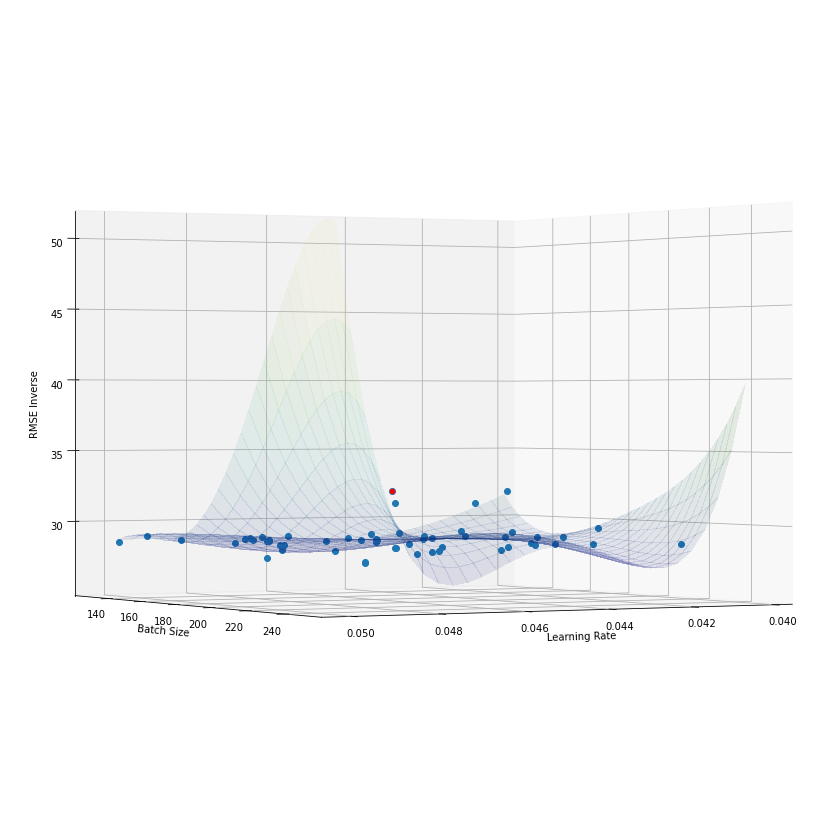

In [114]:
plot_surface(4, learning_rate_sixth, batch_sixth, rmse_inverse_sixth, 0, 60)

<ipython-input-68-cb3cd7a8901d>:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m = np.linalg.lstsq(G, z)[0]


<Figure size 1080x1080 with 0 Axes>

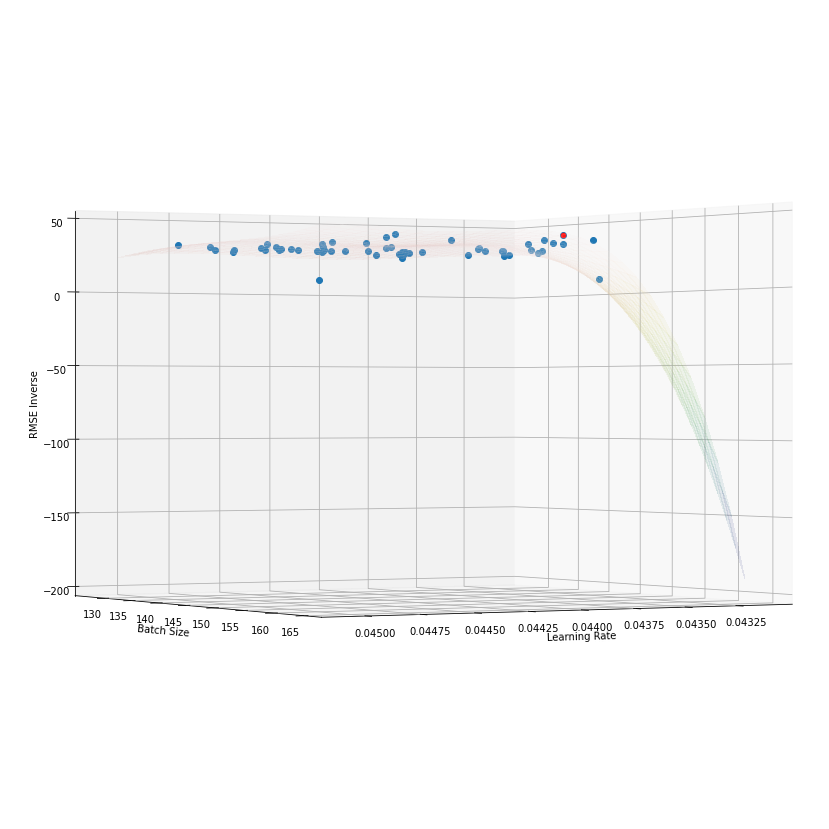

In [115]:
plot_surface(6, learning_rate_sixth_test, batch_sixth_test, rmse_inverse_sixth_test, 0, 60)

In [ ]:
# Group 7, learning rate 0.01-0.02, batch size 64-128

In [116]:
rmse_inverse_seventh = [32.03714318040483, 28.735226472047184, 33.16029619447745, 27.931614009237137, 28.866094063887793, 32.47494846020241, 27.146543469002708, 31.783662298970174, 34.666938137512226, 28.585419970213586, 28.740310880603555, 28.968189778438006, 27.619876695725676, 34.23837770476623, 28.717076846792352, 32.65216097124477, 28.987885737237526, 33.09109610141851, 31.894161645901658, 32.23648354445145, 33.95324049854418, 31.30833250953153, 34.142469915425124, 31.70565209010942, 32.78377328802386, 28.95975557803639, 32.03695698013343, 33.82205284277427, 32.535155804838055, 28.843825754047653, 33.82032980030399, 33.01767960495885, 32.19453537390861, 32.82462029521969, 28.929110425916956, 28.95201325286424, 27.97146172696172, 31.723662765387004, 28.96406542384677, 32.64735699161007, 32.45651924293966, 33.54608695314183, 27.889318080976622, 31.0984515004849, 30.664410124497117, 30.546366220070787, 28.902628837664697, 31.780671266192908, 28.827691387178685, 28.337550115718003, 33.45590335246885, 32.61669872901301, 34.12715575512562, 28.318283381011714, 28.81464407312569]
learning_rate_seventh = [0.01720324493442158, 0.013023325726318398, 0.010923385947687977, 0.013455607270430478, 0.015388167340033568, 0.01368879169973435, 0.01856485101997158, 0.016288117640027626, 0.01758691337562565, 0.011614581718546204, 0.014472002496129708, 0.013520196209863356, 0.013928756964719123, 0.017020481994531947, 0.014066836824442298, 0.015342868692146797, 0.012748939351076127, 0.016734574866815954, 0.014160676187010942, 0.01684104261408902, 0.013998976743912006, 0.016271589276841456, 0.01374879156400456, 0.01832826239704753, 0.017785502795617185, 0.016097204168460964, 0.017685545161228104, 0.013649869265482506, 0.01487979895010642, 0.010912630256126571, 0.012144510316109403, 0.011321144137208888, 0.01027615454693689, 0.01389681689459521, 0.012981388333726343, 0.019457878778571566, 0.018813489106521586, 0.01647749299110956, 0.014703881770821024, 0.018654814634575585, 0.011382050772009869, 0.014566070201797638, 0.0184027022706588, 0.018090163860953343, 0.015274064110697887, 0.016392842931545883, 0.012414684235866003, 0.01858764896536478, 0.016697266430991425, 0.01997808314818316, 0.014000360077208552, 0.01863954423673906, 0.01016498475456441, 0.01963728849091328, 0.01186296817960046]
batch_seventh = [int(x) for x in [90.68940830096474, 64.00731998831007, 73.39237701229524, 75.92065352817093, 89.39311835076288, 70.96168414481659, 90.6894198936836, 73.55562964311869, 69.50861427399062, 89.32015437822473, 120.81260998761655, 91.6668268154178, 103.03356874600492, 99.40488392259589, 73.50047006612226, 68.2756740058423, 85.70872864997332, 76.22033274718517, 122.22544759172087, 74.75689087784812, 109.88839544414829, 69.10313191136711, 64.70339803363655, 78.04695099655324, 96.6620755373278, 118.02250845234147, 114.65611850970018, 64.66195094658708, 93.53231988845232, 95.64344421172268, 84.11764676309734, 120.34166199644937, 65.48440452263887, 67.98664847928323, 111.2744172096985, 106.61568892497661, 78.23380214913033, 69.43704794844545, 121.29452744300234, 91.65891933359768, 65.78572995484397, 123.26177955379552, 120.46898114126049, 103.11669721398432, 68.00849620454784, 85.96979474210784, 110.541926360263, 112.09524374221081, 74.15406498679552, 82.72466247461549, 125.32730885578425, 72.40179618324171, 108.09600586038388, 107.1400553697913, 76.41517289556987]]
rmse_inverse_seventh_test = [31.123308363550084, 28.656463908174135, 28.342546666576187, 28.892636198571317, 32.810925135118616, 28.928733771494343, 33.30070220437903, 28.531654166634613, 32.430244720966286, 32.558378645560985, 28.859938535633937, 28.98933384935018, 28.36454159355876, 32.21041822012711, 28.942900449119566, 31.12536766470471, 28.823204150122592, 27.44812128377988, 33.509982686180926, 31.54495753263786, 28.9381904101998, 28.80436616854405, 28.06076873466797, 32.315993091349824, 28.805091286908578, 28.835399810541134, 33.01333452722949, 31.91100371736808, 28.89853019058409, 31.698243739464857, 26.70305163596146, 32.63003323908836, 31.82816314528158, 28.98869760594788, 28.81265349149101, 31.01673984383584, 30.974473636302783, 32.037475482256895, 28.600925670862843, 35.01128749047786, 28.786639391862632, 27.990644256873303, 28.72522917883747, 28.818205819916923, 28.925313515598305, 28.966100415171816, 28.82729668227227, 30.393566817845613, 30.890553213704777, 28.923571635542917, 33.70207854612048, 33.79651172114051, 35.10860194874506, 28.967012051048783, 30.975451020895004]
learning_rate_seventh_test = [0.018027562362509967, 0.01719157852088933, 0.016771590565163245, 0.017278034829711745, 0.017664546843632365, 0.018218707423711678, 0.01658691337562565, 0.017163947669684036, 0.018175008871392388, 0.01658691337562565, 0.018586913375625652, 0.017392630956070725, 0.017288992179827344, 0.016824972304262834, 0.01740028074051411, 0.016751799346895642, 0.016663082998515086, 0.01850184931689298, 0.01741904861302784, 0.017955121898443456, 0.01738670872440805, 0.017841231230993942, 0.017336671688426564, 0.01825256585503516, 0.018144013934749088, 0.017806354209317844, 0.01812402240787127, 0.017316887228722152, 0.017562873165646937, 0.016769439426850965, 0.01701581543884753, 0.01689942171368935, 0.017273718913851776, 0.017366276754544694, 0.018434216954898622, 0.01672012793714786, 0.017951716937090408, 0.01724742570733076, 0.018425006768444052, 0.016799029644319972, 0.01840669174995329, 0.0182951324721015, 0.018297103109111146, 0.018030946844695084, 0.017641726197765228, 0.018001551392777048, 0.01706985022279885, 0.01816894689156176, 0.017926366661823935, 0.017225904346627945, 0.016711561557652365, 0.017023697732823636, 0.01706947305767127, 0.017797850684052922, 0.016959507011545742]
batch_seventh_test = [int(x) for x in [66.18949446209358, 49.513189266684414, 55.378849906675136, 56.959022729097455, 65.37931324321741, 64.22325380506024, 65.69335024697256, 87.27168559528934, 76.66992828415746, 77.45500657001026, 78.4486172440263, 75.7503738679927, 70.87647982578257, 77.07271011774223, 55.44640806531703, 65.69777953831002, 65.68703826442444, 65.37710923313634, 85.89951901881616, 56.231671072645696, 78.18886142658329, 52.69807171859507, 49.94823804501346, 58.28795864683639, 69.92241148482049, 83.27268205670404, 81.16868834255322, 49.92233361560754, 67.96631420427332, 69.28576690631729, 62.082143500926456, 77.07275686840325, 85.89922594138045, 52.00026957354264, 85.90018086066347, 49.92297315744227, 81.16908100424686, 85.89966511235139, 76.67056938335433, 77.45537814550137, 81.16908652340248, 65.37947526758921, 76.66933592549343, 81.16871004747766, 52.01392440183301, 58.288566093513765, 78.597318249155, 56.2321451499272, 55.854904890737814, 85.89978138439119, 65.6934701019118, 65.69764812886807, 77.45534637570313, 66.18961976689143, 57.26809733372179]]

<ipython-input-68-cb3cd7a8901d>:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m = np.linalg.lstsq(G, z)[0]


<Figure size 1080x1080 with 0 Axes>

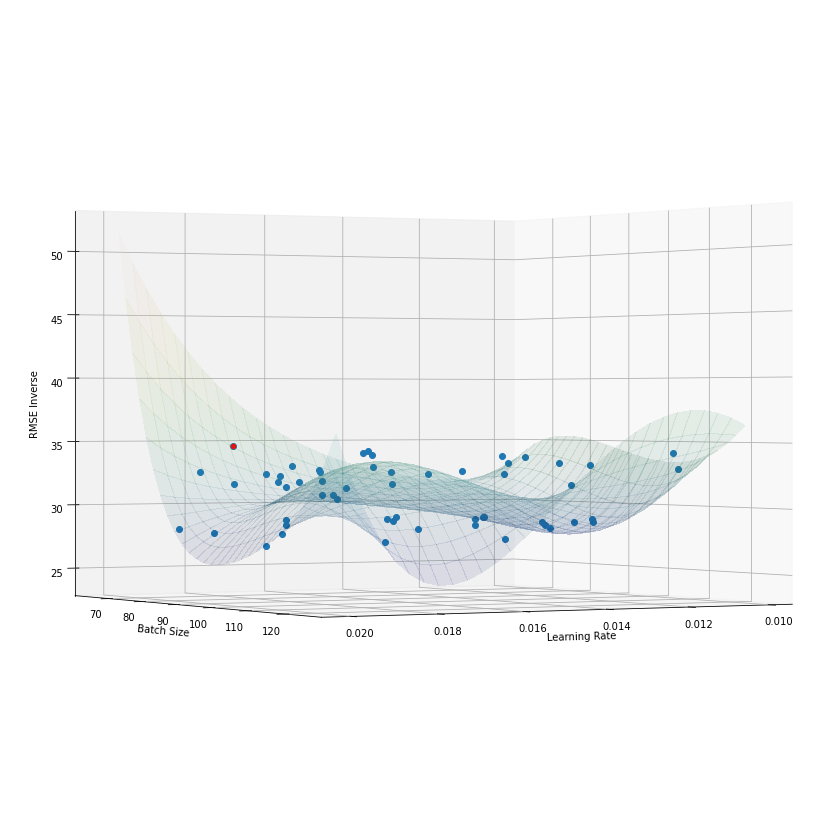

In [119]:
plot_surface(4, learning_rate_seventh, batch_seventh, rmse_inverse_seventh, 0, 60)

<ipython-input-68-cb3cd7a8901d>:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m = np.linalg.lstsq(G, z)[0]


<Figure size 1080x1080 with 0 Axes>

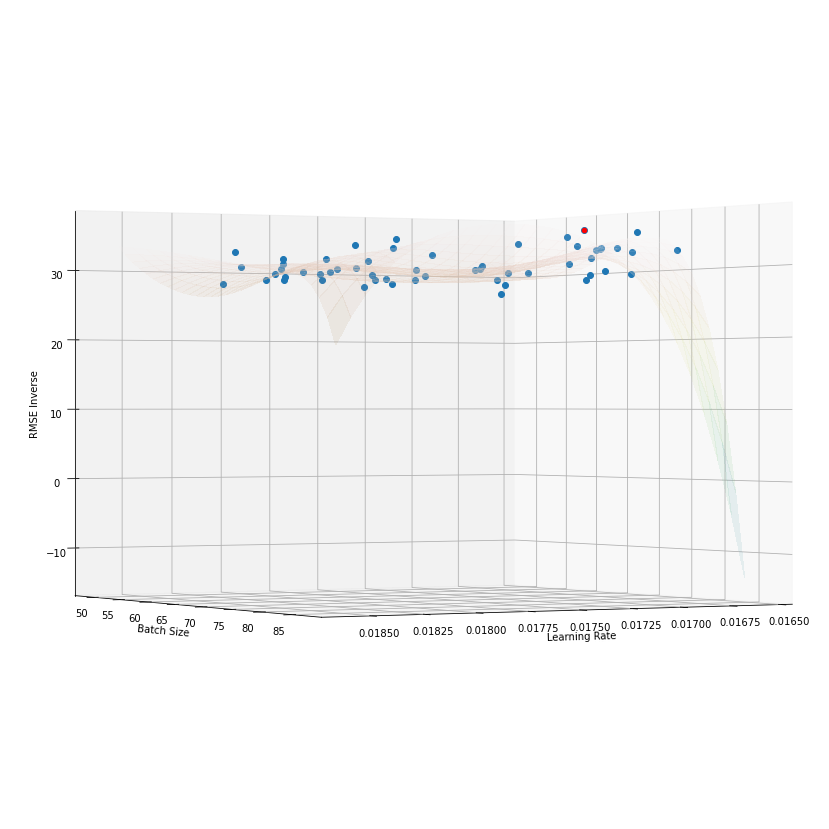

In [120]:
plot_surface(6, learning_rate_seventh_test, batch_seventh_test, rmse_inverse_seventh_test, 0, 60)

In [ ]:
# Group 8, learning rate 0.01-0.02, batch size 128-256

In [121]:
rmse_inverse_eighth = [30.39842210331541, 33.50697864622672, 33.66998573522391, 28.879742267028327, 28.977748645547706, 33.6786811127584, 32.33415941736033, 35.046450171167606, 28.968966429549354, 33.100660506816574, 34.70977917060811, 28.980659106782504, 34.112993968265584, 33.718184820782426, 33.84451859396329, 28.93577093287505, 32.82638115897608, 28.781332231926633, 31.02694287971995, 28.90557673316568, 33.95773785328234, 28.751251854234248, 28.921873161526197, 31.186093862671573, 34.598883673482845, 28.966725571290414, 34.38401164196619, 28.84836255391038, 28.83057002131477, 33.89537236940383, 32.975997513262264, 33.89359924627508, 34.34229007775244, 33.840391260985065, 28.98959259725184, 33.770673008395924, 28.840742541977757, 33.0126648742354, 33.48143550028122, 28.954965629928537, 28.79669199171828, 32.61815048468297, 33.56462715106276, 29.94894447504218, 28.78099746274829, 28.985956000763238, 28.986624173374526, 31.632753529490728, 33.14130539153992, 32.62144362246654, 33.1104359617031, 28.777192610514653, 33.68867736305844, 33.092554350617334, 33.51609321712813]
learning_rate_eighth = [0.01720324493442158, 0.013023325726318398, 0.010923385947687977, 0.013455607270430478, 0.015388167340033568, 0.014671599038822878, 0.013247389147598296, 0.013625032602564341, 0.016579679903071506, 0.02, 0.017700988562032338, 0.02, 0.011264754048337301, 0.01825305508969921, 0.013128744640697748, 0.017634947844358446, 0.01, 0.018027188767672075, 0.010261332606099615, 0.014175589462246747, 0.01, 0.010850799512951972, 0.01240273484284389, 0.01832826239704753, 0.017785502795617185, 0.016097204168460964, 0.017685545161228104, 0.013649869265482506, 0.01487979895010642, 0.010912630256126571, 0.012144510316109403, 0.011321144137208888, 0.01027615454693689, 0.01389681689459521, 0.012981388333726343, 0.019457878778571566, 0.018813489106521586, 0.01647749299110956, 0.014703881770821024, 0.018654814634575585, 0.011382050772009869, 0.014566070201797638, 0.0184027022706588, 0.018090163860953343, 0.015274064110697887, 0.016392842931545883, 0.012414684235866003, 0.01858764896536478, 0.016697266430991425, 0.01997808314818316, 0.014000360077208552, 0.01863954423673906, 0.01016498475456441, 0.01963728849091328, 0.01186296817960046]
batch_eighth = [int(x) for x in [181.3788166019295, 128.01463997662015, 146.78475402459048, 151.84130705634186, 178.78623670152575, 144.78688434438067, 132.58229987838178, 139.4560993244441, 214.24278013570665, 193.1140294878304, 199.08562877109736, 203.3493556855559, 196.60959228086693, 136.83824894302472, 255.98512351906191, 250.9516232736262, 232.4693773922379, 238.28189936966115, 227.39601044031167, 141.67861550897965, 138.3358588706385, 197.91286782407425, 139.61008626001373, 156.09390199310647, 193.3241510746556, 236.04501690468294, 229.31223701940036, 129.32390189317417, 187.06463977690464, 191.28688842344536, 168.23529352619468, 240.68332399289875, 130.96880904527774, 135.97329695856646, 222.548834419397, 213.23137784995322, 156.46760429826065, 138.8740958968909, 242.58905488600467, 183.31783866719536, 131.57145990968795, 246.52355910759104, 240.93796228252097, 206.23339442796865, 136.01699240909568, 171.93958948421567, 221.083852720526, 224.19048748442162, 148.30812997359104, 165.44932494923097, 250.6546177115685, 144.80359236648343, 216.19201172076777, 214.2801107395826, 152.83034579113973]]
rmse_inverse_eighth_test = [34.29450458897458, 28.971647093735207, 28.836388034916173, 28.98927635226614, 32.76175350960626, 33.06745890124709, 28.878823547337777, 33.194657259432084, 31.537479012349635, 28.962336373028645, 33.96886823136819, 28.97562197069945, 31.26130501044268, 28.812741939310904, 34.61572210990649, 33.998666149507606, 34.44733732796094, 28.958829526393135, 28.982055242591564, 28.905925586218206, 28.474511837134102, 32.38943070689427, 28.859236831746728, 32.51785767766474, 28.95429250143663, 28.93241078217975, 33.077677095879196, 28.597295725944125, 30.7517555861586, 33.46494208067022, 33.8691910960637, 32.08137400967432, 28.80536905304056, 28.97245379608344, 28.914482331106473, 28.959169577585428, 28.989614556512453, 28.942360553888367, 34.877678996699174, 33.87436266070811, 31.857656957550553, 33.65511273421914, 28.983276903434636, 28.87716139482167, 33.057002245295706, 28.89523487544074, 28.620965854736266, 28.981532611608085, 28.98923552066781, 28.69920322903446, 28.989523297614188, 32.849892259266724, 34.408140160709294, 32.19082205224774, 33.19275644488027]
learning_rate_eighth_test = [0.014065681589448657, 0.01322969774782802, 0.012809709792101935, 0.013316154056650436, 0.013702666070571055, 0.01396542502324942, 0.01262503260256434, 0.012897917437643142, 0.014625032602564342, 0.01262503260256434, 0.014625032602564342, 0.01262503260256434, 0.014625032602564342, 0.014625032602564342, 0.0134383999674528, 0.0136936063409937, 0.013174820472779566, 0.013971947575927532, 0.01345716783996653, 0.013993241125382146, 0.013424827951346741, 0.013879350457932633, 0.013374790915365253, 0.014290685081973847, 0.014182133161687779, 0.013844473436256534, 0.014162141634809961, 0.013346728336696895, 0.0145523719066475, 0.01289714398704455, 0.014070448048871318, 0.013663518755259209, 0.01412766065815509, 0.014095461428547288, 0.014126404351432123, 0.013425937318113933, 0.014283820083801758, 0.013630878679944437, 0.013473800579446839, 0.014621198455746422, 0.013940941107404594, 0.014474131340260524, 0.014529382166318229, 0.014069066071633775, 0.013652780194358068, 0.013751546284058483, 0.012990345308958765, 0.014381343943424043, 0.013964485888762626, 0.013903642917263101, 0.013235949424890458, 0.014352941449912154, 0.014211844476678021, 0.013835969910991612, 0.012997626238484432]
batch_eighth_test = [int(x) for x in [136.13697951254704, 119.46067431713789, 125.32633495712862, 126.90650777955094, 135.3267982936709, 138.2529690576861, 143.67113024645707, 159.4560993244441, 156.60849763749763, 151.22493761746995, 131.22001069678785, 132.66143263144411, 137.09561345509735, 130.5682236170494, 125.39389311577051, 122.12839557809554, 133.02405473067742, 127.09380729143483, 155.84700406926964, 126.17915612309918, 148.13634647703677, 122.64555676904855, 119.89572309546695, 128.23544369728987, 139.86989653527397, 153.22016710715752, 151.1161733930067, 125.39400982324153, 156.60839707673165, 159.45602779053337, 136.13757602304105, 133.0237605977719, 136.13707973237584, 135.32663344906734, 122.6455156085742, 122.12846832876276, 137.09558026967125, 122.12827593610687, 136.1371349072125, 131.22044012407517, 151.11625363374247, 128.23559626647565, 131.21967252939163, 151.11619509793115, 133.02389665532377, 122.12831982397883, 159.45590616111946, 138.25266067545772, 125.8023899411913, 133.02414215518584, 136.13736601048626, 124.70722193897016, 124.70715805386939, 136.1371048173449, 127.21558238417526]]

<ipython-input-68-cb3cd7a8901d>:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m = np.linalg.lstsq(G, z)[0]


<Figure size 1080x1080 with 0 Axes>

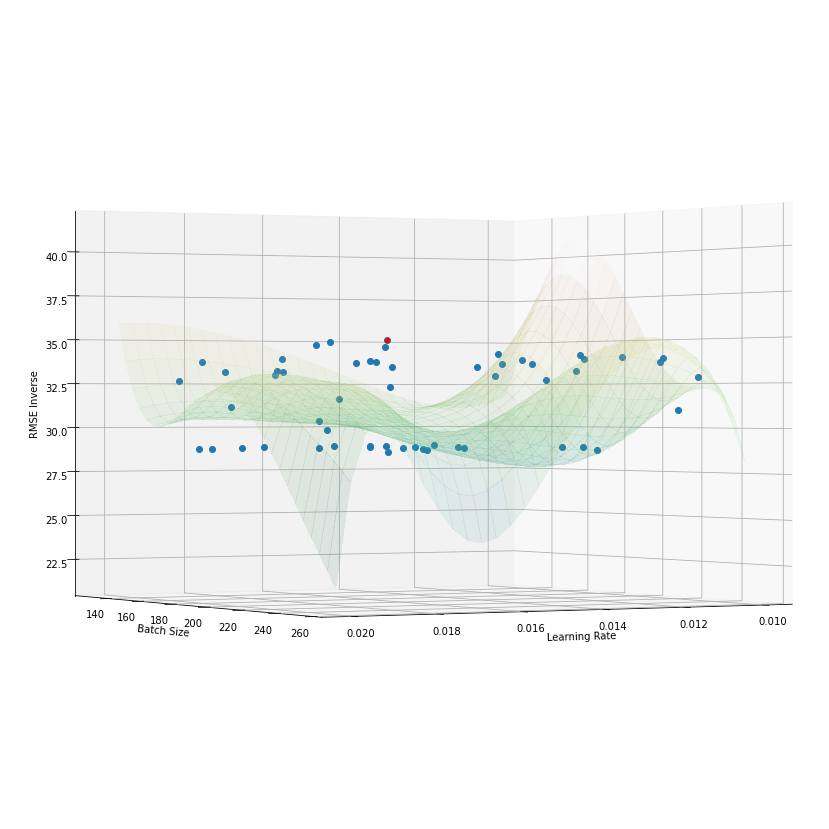

In [126]:
plot_surface(6, learning_rate_eighth, batch_eighth, rmse_inverse_eighth, 0, 60)

<ipython-input-68-cb3cd7a8901d>:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m = np.linalg.lstsq(G, z)[0]


<Figure size 1080x1080 with 0 Axes>

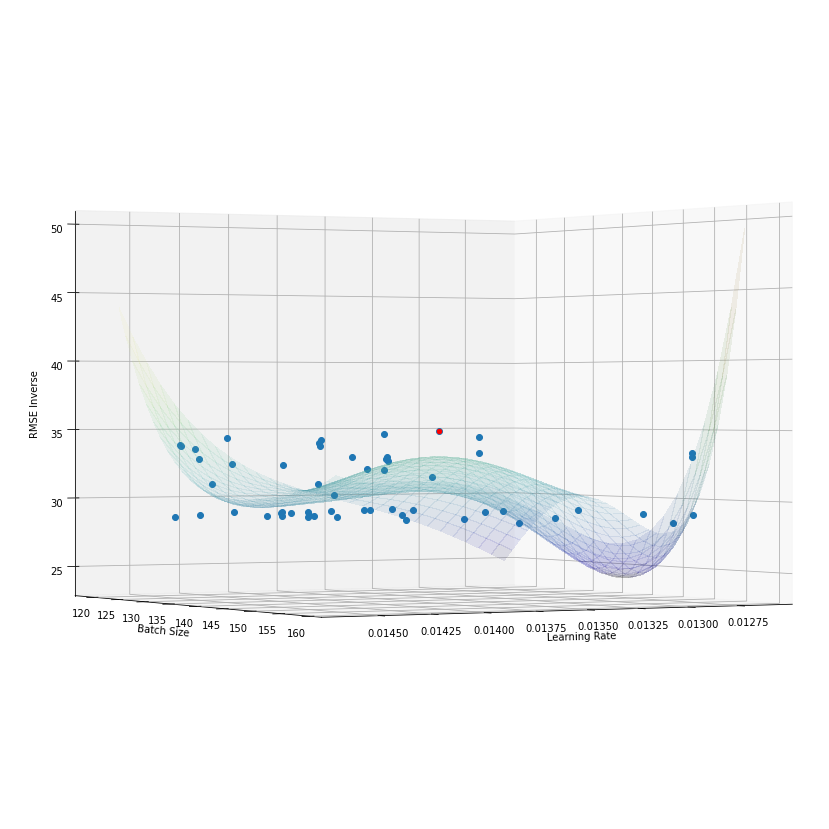

In [123]:
plot_surface(6, learning_rate_eighth_test, batch_eighth_test, rmse_inverse_eighth_test, 0, 60)

In [ ]:
# Group 9, learning rate 0.001-0.01, batch size 64-128

In [127]:
rmse_inverse_ninth = [34.640699124137235, 33.356504527879935, 33.47641311527926, 34.09420662199543, 33.92155906486124, 32.70590144165588, 34.835770751961185, 32.77533662745586, 33.63439651725643, 32.76024183801582, 33.60453220499687, 28.955763010821144, 35.03160711399674, 33.32492178967033, 33.07793970015148, 34.31579897192229, 33.59094940954192, 35.848892757015506, 33.919220574793606, 33.83104314080621, 33.92673524279183, 34.65799922126233, 35.48553737093386, 34.059711019400225, 34.636042978551586, 33.46773087744045, 28.79057265686902, 33.02660613407415, 34.30809991496744, 33.76623464556277, 33.97368960912619, 33.86392480418228, 33.18447448239593, 34.99017799855145, 33.87584230165265, 34.12786311753993, 34.65931046255002, 35.509137086111025, 34.07032838397139, 33.99855532769843, 33.34361361102367, 30.78264049368161, 34.252568659915575, 26.618942595758053, 34.13384649167357, 34.16448004838022, 33.71993879182118, 33.53107288120564, 32.08974624306327, 32.674427095191085, 33.460598623912354, 34.53879562321352, 32.97801769940397, 28.14051621649513, 33.01394170486789]
learning_rate_ninth = [0.007482920440979424, 0.0037209931536865584, 0.0018310473529191804, 0.00411004654338743, 0.005849350606030213, 0.001, 0.006941241254428767, 0.0066593058760248645, 0.00293279116346224, 0.002453123546691584, 0.0050248022465167385, 0.00858408237529774, 0.003660795834376212, 0.007318433795078751, 0.004660153141998068, 0.0058085818229321184, 0.003474045415968514, 0.007061117380134358, 0.004744608568309848, 0.0071569383526801185, 0.0045990790695208065, 0.006644430349157312, 0.004373912407604104, 0.008495436157342778, 0.008006952516055467, 0.006487483751614868, 0.007916990645105294, 0.004284882338934256, 0.005391819055095779, 0.001821367230513913, 0.0029300592844984626, 0.0021890297234879986, 0.001248539092243202, 0.004507135205135689, 0.0036832495003537085, 0.00951209090071441, 0.00893214019586943, 0.006829743691998605, 0.005233493593738921, 0.00878933317111803, 0.002243845694808882, 0.005109463181617874, 0.00856243204359292, 0.008281147474858006, 0.005746657699628099, 0.0067535586383912945, 0.003173215812279402, 0.0087288840688283, 0.007027539787892284, 0.009980274833364847, 0.004600324069487698, 0.008775589813065154, 0.001148486279107968, 0.009673559641821955, 0.0026766713616404136]
batch_ninth = [int(x) for x in [90.68940830096474, 64.00731998831007, 73.39237701229524, 75.92065352817093, 89.39311835076288, 91.16542016814526, 117.1201221047883, 73.55562964311869, 117.10486948954215, 89.32015437822473, 120.81260998761655, 117.12226172810651, 64.00737417843919, 99.40488392259589, 73.50047006612226, 68.2756740058423, 85.70872864997332, 76.22033274718517, 122.22544759172087, 74.75689087784812, 109.88839544414829, 69.10313191136711, 64.70339803363655, 78.04695099655324, 96.6620755373278, 118.02250845234147, 114.65611850970018, 64.66195094658708, 93.53231988845232, 95.64344421172268, 84.11764676309734, 120.34166199644937, 65.48440452263887, 67.98664847928323, 111.2744172096985, 106.61568892497661, 78.23380214913033, 69.43704794844545, 121.29452744300234, 91.65891933359768, 65.78572995484397, 123.26177955379552, 120.46898114126049, 103.11669721398432, 68.00849620454784, 85.96979474210784, 110.541926360263, 112.09524374221081, 74.15406498679552, 82.72466247461549, 125.32730885578425, 72.40179618324171, 108.09600586038388, 107.1400553697913, 76.41517289556987]]
rmse_inverse_ninth_test = [34.29767681375495, 33.72255227803968, 34.33647619808263, 33.92680016948591, 32.88400674149046, 33.24287606281629, 34.18581571923255, 34.61157869352174, 34.06778313770624, 34.894815331616655, 34.387554224926205, 32.75228692820525, 33.086415381187614, 35.11210668871492, 34.021046517410774, 29.8160643139841, 34.43196516694112, 34.545057099803614, 35.041731367868024, 34.35165014286427, 32.32296626394154, 34.81973372820273, 32.814185207558275, 32.80220552212201, 34.200342210364035, 34.882101194220546, 33.886230950754204, 34.59702981488665, 34.38142939139648, 33.56093625879329, 33.889871834497086, 34.57583819927931, 33.79013344717653, 35.1917227455837, 33.53445969482292, 33.596123098732804, 35.13857787348553, 34.10232003853867, 33.89948998156035, 34.27549216018519, 34.43500623427819, 34.80784768469503, 34.16293767767804, 34.237011038819745, 34.32382999183062, 34.21706342966609, 34.478972473109046, 33.73833901003726, 33.44950756643875, 34.07194550901794, 34.70393726314407, 33.546372259243455, 33.84662932250304, 33.82440414929758, 32.913127740187925]
learning_rate_ninth_test = [0.007501766367018674, 0.006665782525398037, 0.0062457945696719535, 0.006752238834220453, 0.007138750848141071, 0.007662436696392837, 0.007381393214451861, 0.0073187409081398825, 0.007578500055259488, 0.006384033723843599, 0.0069555178793602995, 0.006765156622107029, 0.006846868773078182, 0.007465213779040747, 0.006874484745022817, 0.007129691118563717, 0.0066109052503495825, 0.007408032353497548, 0.006893252617536546, 0.0074293259029521615, 0.006860912728916759, 0.006180071243167374, 0.0073015271673719465, 0.007475907053404471, 0.007795280572086709, 0.007261831302192893, 0.006996024786941173, 0.006782813114266912, 0.006384174407047955, 0.0061752453451614665, 0.0064900194433562385, 0.006395511211421413, 0.0075637454357251055, 0.0068404807590533995, 0.00714343063648676, 0.006787324465959366, 0.007311868833016718, 0.00735661597835627, 0.006383207420855523, 0.007792080307049475, 0.007204333499570694, 0.00756260648481345, 0.007741657834266117, 0.007679150152325026, 0.007612799683916133, 0.006810544083223405, 0.0069708816491281704, 0.0079646376051601, 0.007400570666332642, 0.008056734009770989, 0.006861189395576068, 0.0077890262274821695, 0.006795885961423954, 0.007988575078317014, 0.0064417130633687624]
batch_ninth_test = [int(x) for x in [72.90121293528813, 56.224907739878965, 62.09056837986969, 63.67074120229201, 72.09103171641196, 72.90442947145948, 89.42040906267786, 62.19260127413435, 59.6632166684293, 72.04542923357562, 91.72821398944552, 73.5120995068213, 80.61631321343825, 78.34838519880759, 62.15812653851158, 58.89262900083661, 69.7882881534185, 63.8580407141759, 92.6112374920107, 62.94338954584025, 84.90057989977785, 62.09040833981508, 72.04572745583353, 91.72766235809439, 78.34857348904953, 92.61136496947286, 92.6121637060823, 62.15824324598261, 69.78766732431258, 72.04585097733512, 68.793861974121, 62.15895255870694, 72.9013131551169, 58.71198804673719, 58.711296758456584, 62.15894730335581, 62.192093124936385, 59.61848771496358, 58.71174488574608, 73.50715733068373, 91.72898348513769, 72.90080971341492, 91.51344596047296, 80.66826850592537, 63.857371546392436, 58.712423431037074, 73.50675832167715, 62.94330926859316, 62.566623363932365, 67.92324679381984, 94.54990078205032, 61.471455361711236, 62.19238391328754, 83.18286735330473, 72.045424048274]]

<ipython-input-68-cb3cd7a8901d>:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m = np.linalg.lstsq(G, z)[0]


<Figure size 1080x1080 with 0 Axes>

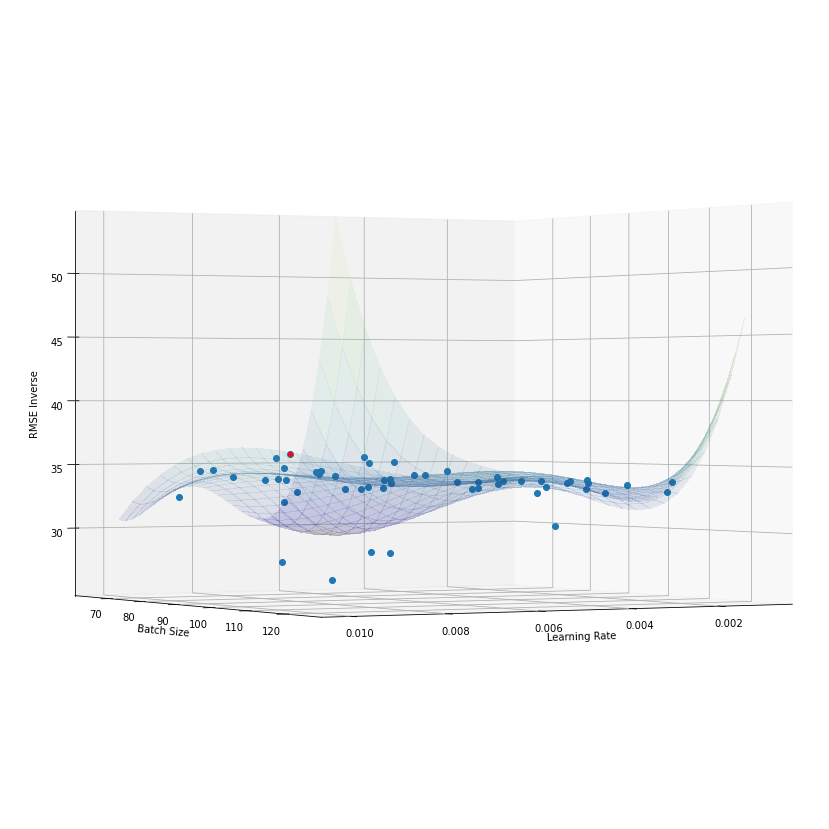

In [129]:
plot_surface(4, learning_rate_ninth, batch_ninth, rmse_inverse_ninth, 0, 60)

<ipython-input-68-cb3cd7a8901d>:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m = np.linalg.lstsq(G, z)[0]


<Figure size 1080x1080 with 0 Axes>

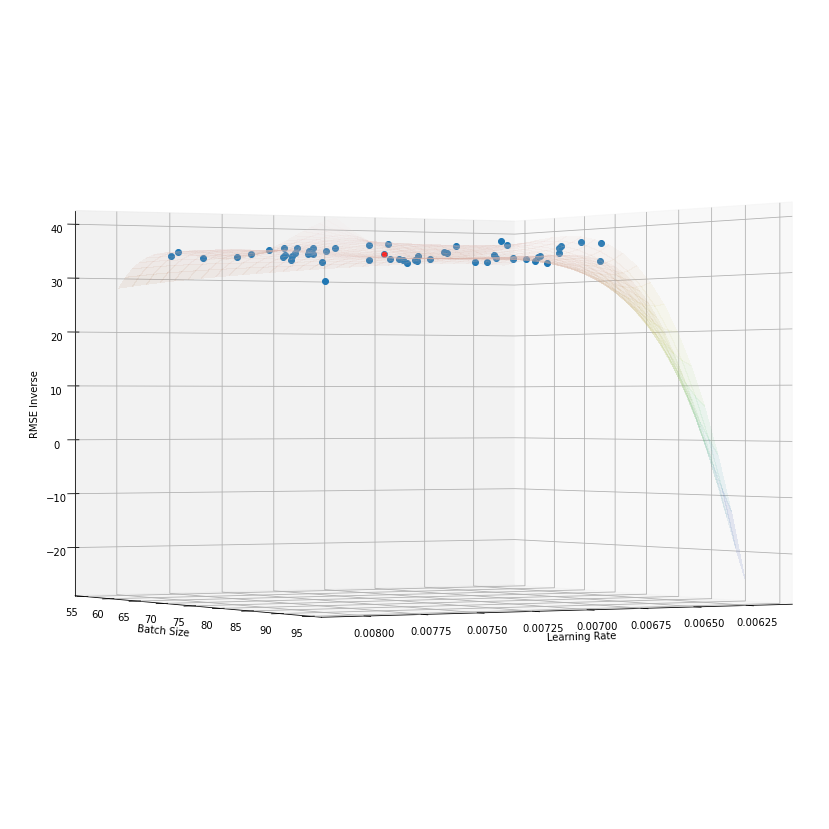

In [130]:
plot_surface(6, learning_rate_ninth_test, batch_ninth_test, rmse_inverse_ninth_test, 0, 60)

In [ ]:
# Group 10, learning rate 0.001-0.01, batch size 128-256

In [135]:
rmse_inverse_tenth = [34.62973317222293, 33.83586214471578, 33.17927142106428, 33.55998136864561, 34.26338228288676, 34.57063715352721, 33.3878577753487, 32.562346542117865, 28.84298281425157, 33.99923614745594, 33.678702125209895, 33.15049212660333, 32.764245166467894, 28.293870472259012, 34.138874790885, 33.616581362802734, 33.411893467304765, 33.376790332507994, 34.07237625212743, 33.048866863279116, 33.75867500668145, 33.75495252379554, 33.84223831798447, 33.91212144606854, 34.12658802565075, 33.23176142436109, 34.00000163203964, 32.86021744929533, 33.19458855531355, 33.46579641004812, 33.48242879040959, 33.495718027775226, 33.918078106920895, 33.34758050981338, 33.59297368926434, 33.47482895309155, 33.24313826293095, 33.603522081352565, 34.252973941280146, 34.50154786628734, 33.12114574132548, 33.709937280981386, 33.32642970233044, 33.676769101426096, 33.61512810938758, 33.26815528912851, 33.320471759231225, 33.43495643379226, 34.23270078511619, 34.355573329654966, 33.76560976247545, 33.84195520566738, 34.3623758577395, 32.642377156549585, 33.28547412308657]
learning_rate_tenth = [0.007482920440979424, 0.0037209931536865584, 0.0018310473529191804, 0.00411004654338743, 0.005849350606030213, 0.00948303235329331, 0.001, 0.003656100495409989, 0.01, 0.01, 0.009346675008290197, 0.001, 0.006126782030522219, 0.00845543225890984, 0.004660153141998068, 0.0016608411184732847, 0.002126710261046023, 0.008632682499793732, 0.00900344530362921, 0.004615112615893832, 0.00404767307422617, 0.004592387576862021, 0.007103463513537474, 0.008495436157342778, 0.005258308621807817, 0.006487483751614868, 0.004722465415982213, 0.0028304916134046175, 0.005391819055095779, 0.004671339660892728, 0.0029300592844984626, 0.005189615978347228, 0.009958612637334462, 0.005037378968662747, 0.008760144522861415, 0.00951209090071441, 0.0027804468484273277, 0.002133036255324475, 0.0048194558959712384, 0.00878933317111803, 0.004301981732885123, 0.005109463181617874, 0.002666236646678595, 0.005687656615747028, 0.003427733766663145, 0.0067535586383912945, 0.007574319566715026, 0.004570149863257501, 0.007027539787892284, 0.009980274833364847, 0.006861851043284962, 0.008775589813065154, 0.008140653433511558, 0.009673559641821955, 0.0051926865043554656]
batch_tenth = [int(x) for x in [181.3788166019295, 128.01463997662015, 146.78475402459048, 151.84130705634186, 178.78623670152575, 186.8435729621753, 199.04426402356225, 255.97074095009208, 225.57036635261457, 163.60562228179091, 135.09166268095456, 184.0297955885405, 189.76007852881276, 176.2042061454788, 147.00094013224452, 147.71992271281349, 180.63199150633523, 181.40121486944676, 186.84682975769573, 186.82396758403587, 181.36171299278578, 178.80557666070274, 178.76313715138423, 156.09390199310647, 147.02420750646186, 236.04501690468294, 147.0463584324466, 163.58154879573294, 187.06463977690464, 163.63112406953957, 168.23529352619468, 156.06859094244504, 146.98016410616293, 147.06985580182476, 181.37879694903282, 213.23137784995322, 199.0443453887239, 178.7861048508015, 181.37931386485894, 183.31783866719536, 181.37194887789778, 246.52355910759104, 147.00517271306057, 183.31544096412892, 147.0239810733193, 171.93958948421567, 183.3221176327367, 186.84482125466255, 148.30812997359104, 165.44932494923097, 181.38299767966367, 144.80359236648343, 144.80338793416095, 214.2801107395826, 148.3105966170727]]
rmse_inverse_tenth_test = [28.861637570438035, 33.05255776228021, 34.47273030038154, 33.40532261987728, 34.31157098044248, 31.758307595034584, 33.73302459672285, 32.206531896091896, 28.955048858123273, 33.95367015523035, 34.10275828952305, 28.938861607762657, 34.205641483714636, 34.03016856399952, 33.84276227461079, 33.72930985092263, 33.302193627104856, 33.50571738152931, 33.75344300657821, 34.36832613203284, 32.84893683253114, 33.43416522263936, 33.68419835709627, 33.43373568953801, 33.71270449607848, 32.38237249288223, 33.81907712052924, 35.02448903970892, 34.08590209286617, 33.85897622550564, 28.75259013712547, 34.35275476666175, 34.101406600233446, 34.21839576981921, 33.6133310806418, 34.747226815034615, 33.60950798607227, 33.1565506747607, 33.80341559786402, 32.41354965797469, 33.20118844504672, 33.55413888147868, 33.02174527228207, 33.73021968159238, 34.449166826123374, 33.6829145032667, 33.96655818178176, 33.47095336233434, 34.202947709466606, 34.17827816420245, 34.50580595634074, 33.58390528624501, 33.03864748272668, 33.36407246192292, 34.26646926026902]
learning_rate_tenth_test = [0.007923569427863741, 0.007087585586243103, 0.00666759763051702, 0.007174041895065519, 0.007560553908986138, 0.006673803638163853, 0.007803196275296928, 0.0077405439689849495, 0.008000303116104555, 0.006805836784688665, 0.0073773209402053655, 0.007186959682952095, 0.007074208404174137, 0.007014154344239777, 0.006492692789478049, 0.0068702320918693485, 0.007128632489555108, 0.007936659359625033, 0.00782365316986194, 0.006927856573887469, 0.007569243073962337, 0.00660187430401244, 0.006858746274828044, 0.007898029370115986, 0.0066351408143968055, 0.0074778847932746775, 0.008165838267246943, 0.006740351512905238, 0.007526200468625534, 0.0065970484060065325, 0.008201281551541675, 0.006649587445419088, 0.007157840352210433, 0.0072622838198984655, 0.006594943481657025, 0.007469519348260057, 0.008245618262283741, 0.006734706275495974, 0.00682428250450812, 0.008213883367894541, 0.006580552177319123, 0.0065866438957690185, 0.008163460895111184, 0.008100953213170092, 0.008405094089672566, 0.007232347144068471, 0.006965857288152624, 0.007194106539257164, 0.00782237372717771, 0.008478537070616056, 0.007282992456421135, 0.00763212617975877, 0.008135464842609923, 0.007664082037833355, 0.0068635161242138285]
batch_tenth_test = [int(x) for x in [178.05969679003243, 161.38339159462328, 167.249052234614, 168.82922505703633, 177.24951557115628, 167.24503710540057, 194.57889291742217, 167.35108512887868, 164.8217005231736, 177.20391308831995, 196.88669784418983, 178.6705833615656, 161.383425463454, 161.3836823869621, 167.24825270449273, 177.24935075289096, 167.249545217035, 196.8872592942234, 161.38421365723428, 177.2046198621368, 194.57846277850763, 167.2488921945594, 177.24946428416553, 194.57916627317059, 177.24965465442935, 177.20365231219256, 194.57918662846902, 177.24891042920103, 161.38373825552844, 177.20433483207944, 196.8875171337781, 167.24933466984874, 168.82964114575324, 163.8704719014815, 168.82896119072478, 167.24996440785065, 170.27494294513593, 177.24947436780496, 177.20459531435745, 178.66564118542803, 161.38360074765242, 177.20502051514117, 196.67192981521728, 185.82675236066967, 177.24989698776523, 163.87090728578139, 190.46752057709386, 177.24861281541484, 167.7251072186767, 173.08173064856416, 199.70838463679465, 196.88660231924678, 173.0817455515923, 196.88729482412393, 177.20390790301832]]

In [136]:
# remove two outlier points
minlearning = min(rmse_inverse_tenth)
xmin = learning_rate_tenth[rmse_inverse_tenth.index(minlearning)]
ymin = batch_tenth[rmse_inverse_tenth.index(minlearning)]
learning_rate_tenth.remove(xmin)
batch_tenth.remove(ymin)
rmse_inverse_tenth.remove(minlearning)

minlearning = min(rmse_inverse_tenth)
xmin = learning_rate_tenth[rmse_inverse_tenth.index(minlearning)]
ymin = batch_tenth[rmse_inverse_tenth.index(minlearning)]
learning_rate_tenth.remove(xmin)
batch_tenth.remove(ymin)
rmse_inverse_tenth.remove(minlearning)

<ipython-input-68-cb3cd7a8901d>:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m = np.linalg.lstsq(G, z)[0]


<Figure size 1080x1080 with 0 Axes>

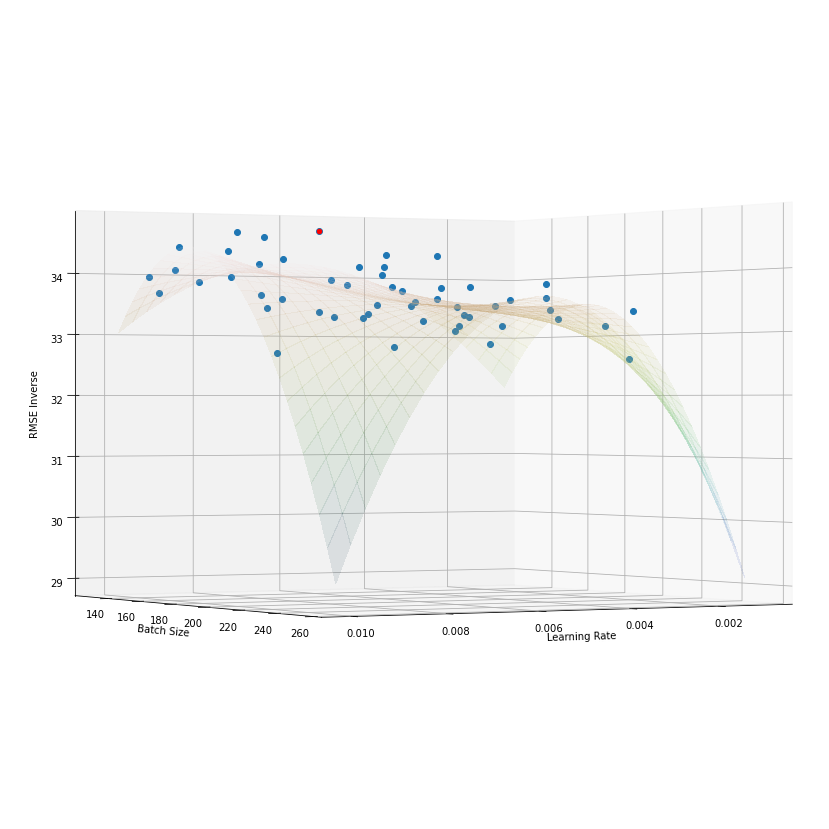

In [139]:
plot_surface(2, learning_rate_tenth, batch_tenth, rmse_inverse_tenth, 0, 60)

<ipython-input-68-cb3cd7a8901d>:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  m = np.linalg.lstsq(G, z)[0]


<Figure size 1080x1080 with 0 Axes>

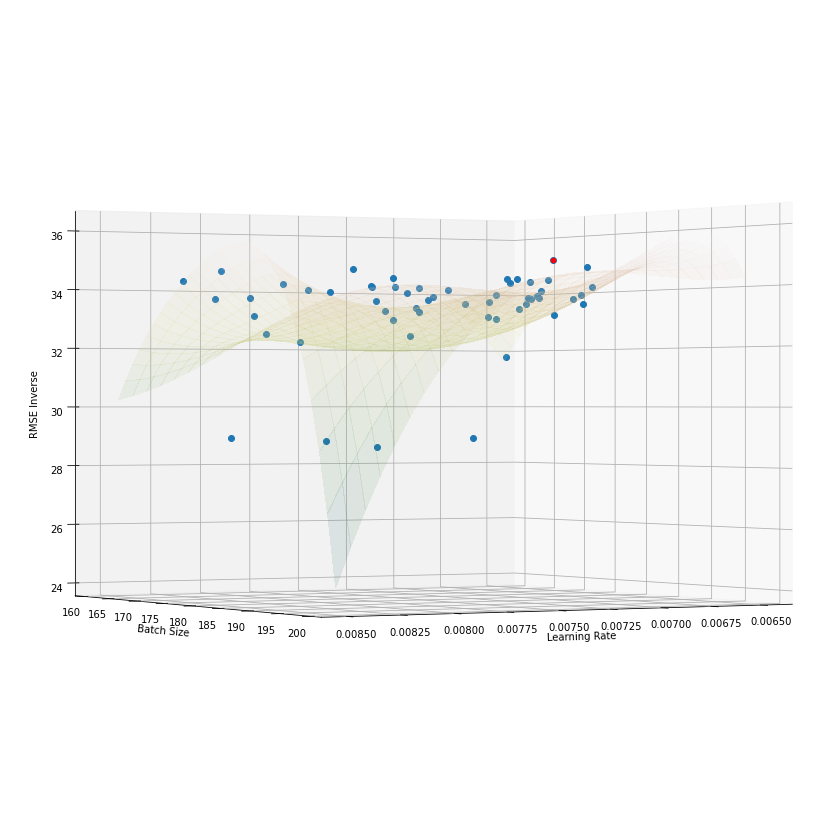

In [133]:
plot_surface(6, learning_rate_tenth_test, batch_tenth_test, rmse_inverse_tenth_test, 0, 60)